### APPLIANCE ENERGY PREDICTION

### Introduction

"Home Appliance Energy Prediction" is a regression problem, where the goal is to predict how much energy (power) will be consumed by home appliances in the future.

### Objective

The objective of the Appliances Energy Prediction dataset is to predict the energy consumption of household appliances based on environmental and weather-related features, enabling energy efficiency analysis and smart home automation.

### Initial Step EDA (Exploratory Data Analysis)

In [94]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load and Limit the Dataset

In [95]:
data = pd.read_csv("energydata_complete.csv")

# Use only the first 12,000 rows
data = df.iloc[:12000]


In [96]:
# Coverting to Data Frame
df = pd.DataFrame(data)
df

Appliances  lights         T1       RH_1     T2       RH_2     T3  \
0            60.0    25.0  19.890000  47.596667  19.20  44.790000  19.79   
1            60.0    25.0  19.890000  46.693333  19.20  44.722500  19.79   
2            50.0    25.0  19.890000  46.300000  19.20  44.626667  19.79   
3            50.0    25.0  19.890000  46.066667  19.20  44.590000  19.79   
4            60.0    25.0  19.890000  46.333333  19.20  44.530000  19.79   
...           ...     ...        ...        ...    ...        ...    ...   
11995        60.0     0.0  22.033333  44.530000  20.79  45.290000  23.00   
11996        50.0    10.0  22.000000  44.466667  20.73  45.400000  23.00   
11997        70.0     0.0  22.000000  44.466667  20.73  45.466667  23.00   
11998        70.0     0.0  22.000000  44.450000  20.70  45.530000  23.00   
11999        50.0     0.0  22.000000  44.500000  20.70  45.590000  23.00   

            RH_3         T4       RH_4  ...         T9   RH_9      T_out  \
0      44.730000  19.000000  45.566667  ...  17.033333  45.53   6.600000   
1      44.790000  19.000000  45.992500  ...  17.066667  45.56   6.483333   
2      44.933333  18.926667  45.890000  ...  17.000000  45.50   6.366667   
3      45.000000  18.890000  45.723333  ...  17.000000  45.40   6.250000   
4      45.000000  18.890000  45.530000  ...  17.000000  45.40   6.133333   
...          ...        ...        ...  ...        ...    ...        ...   
11995  41.790000  21.166667  44.000000  ...  20.323333  46.29  14.966667   
11996  41.790000  21.100000  44.000000  ...  20.323333  46.29  14.933333   
11997  41.790000  21.100000  44.000000  ...  20.390000  46.29  14.900000   
11998  41.790000  21.100000  44.000000  ...  20.323333  46.23  14.866667   
11999  41.790000  21.100000  44.000000  ...  20.390000  46.20  14.833333   

       Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint  hour  \
0       733.500000  92.000000   7.000000   63.000000        5.3    17   
1       733.600000  92.000000   6.666667   59.166667        5.2    17   
2       733.700000  92.000000   6.333333   55.333333        5.1    17   
3       733.800000  92.000000   6.000000   51.500000        5.0    17   
4       733.900000  92.000000   5.666667   47.666667        4.9    17   
...            ...        ...        ...         ...        ...   ...   
11995   748.583333  76.166667   5.000000   38.166667       10.7     0   
11996   748.566667  76.333333   5.000000   36.333333       10.7     0   
11997   748.550000  76.500000   5.000000   34.500000       10.7     0   
11998   748.533333  76.666667   5.000000   32.666667       10.7     0   
11999   748.516667  76.833333   5.000000   30.833333       10.7     0   

       dayofweek  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
11995          0  
11996          0  
11997          0  
11998          0  
11999          0  

[12000 rows x 28 columns]

In [98]:
# Drop unnecessary columns
df =df.drop(['lights'], axis=1)

### Data description

The dataset contains measurements of ambient and weather conditions taken over a period of time in a house located in Belgium. It includes features such as temperature and humidity readings from different rooms, along with external weather data (like wind speed, visibility, and outdoor temperature). The dataset also provides time-based features such as the hour of the day and whether the day is a weekday or weekend.

The main target variable, Appliances, represents the energy consumed by home appliances in watt-hours (Wh), and is the focus of prediction in this regression task.

✅ Key Feature Categories:
Temperature (T1 to T9): Indoor temperatures from different rooms

Humidity (RH_1 to RH_9): Relative humidity from corresponding rooms

Weather-related features: T_out, RH_out, Windspeed, Visibility, Press_mm_hg

Time features: date, NSM (Number of seconds from midnight), WeekStatus, Day_of_week

Target: Appliances (energy usage in Wh)

### Initial Inspection

In [99]:
# To view first few rows 
df.head()

Appliances     T1       RH_1    T2       RH_2     T3       RH_3         T4  \
0        60.0  19.89  47.596667  19.2  44.790000  19.79  44.730000  19.000000   
1        60.0  19.89  46.693333  19.2  44.722500  19.79  44.790000  19.000000   
2        50.0  19.89  46.300000  19.2  44.626667  19.79  44.933333  18.926667   
3        50.0  19.89  46.066667  19.2  44.590000  19.79  45.000000  18.890000   
4        60.0  19.89  46.333333  19.2  44.530000  19.79  45.000000  18.890000   

        RH_4         T5  ...         T9   RH_9     T_out  Press_mm_hg  RH_out  \
0  45.566667  17.166667  ...  17.033333  45.53  6.600000        733.5    92.0   
1  45.992500  17.166667  ...  17.066667  45.56  6.483333        733.6    92.0   
2  45.890000  17.166667  ...  17.000000  45.50  6.366667        733.7    92.0   
3  45.723333  17.166667  ...  17.000000  45.40  6.250000        733.8    92.0   
4  45.530000  17.200000  ...  17.000000  45.40  6.133333        733.9    92.0   

   Windspeed  Visibility  Tdewpoint  hour  dayofweek  
0   7.000000   63.000000        5.3    17          0  
1   6.666667   59.166667        5.2    17          0  
2   6.333333   55.333333        5.1    17          0  
3   6.000000   51.500000        5.0    17          0  
4   5.666667   47.666667        4.9    17          0  

[5 rows x 27 columns]

In [100]:
# To view last few rows
df.tail()

Appliances         T1       RH_1     T2       RH_2    T3   RH_3  \
11995        60.0  22.033333  44.530000  20.79  45.290000  23.0  41.79   
11996        50.0  22.000000  44.466667  20.73  45.400000  23.0  41.79   
11997        70.0  22.000000  44.466667  20.73  45.466667  23.0  41.79   
11998        70.0  22.000000  44.450000  20.70  45.530000  23.0  41.79   
11999        50.0  22.000000  44.500000  20.70  45.590000  23.0  41.79   

              T4  RH_4     T5  ...         T9   RH_9      T_out  Press_mm_hg  \
11995  21.166667  44.0  19.79  ...  20.323333  46.29  14.966667   748.583333   
11996  21.100000  44.0  19.79  ...  20.323333  46.29  14.933333   748.566667   
11997  21.100000  44.0  19.79  ...  20.390000  46.29  14.900000   748.550000   
11998  21.100000  44.0  19.79  ...  20.323333  46.23  14.866667   748.533333   
11999  21.100000  44.0  19.79  ...  20.390000  46.20  14.833333   748.516667   

          RH_out  Windspeed  Visibility  Tdewpoint  hour  dayofweek  
11995  76.166667        5.0   38.166667       10.7     0          0  
11996  76.333333        5.0   36.333333       10.7     0          0  
11997  76.500000        5.0   34.500000       10.7     0          0  
11998  76.666667        5.0   32.666667       10.7     0          0  
11999  76.833333        5.0   30.833333       10.7     0          0  

[5 rows x 27 columns]

In [101]:
 # shows structure and contents of dataset
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   12000 non-null  float64
 1   T1           12000 non-null  float64
 2   RH_1         12000 non-null  float64
 3   T2           12000 non-null  float64
 4   RH_2         12000 non-null  float64
 5   T3           12000 non-null  float64
 6   RH_3         12000 non-null  float64
 7   T4           12000 non-null  float64
 8   RH_4         12000 non-null  float64
 9   T5           12000 non-null  float64
 10  RH_5         12000 non-null  float64
 11  T6           12000 non-null  float64
 12  RH_6         12000 non-null  float64
 13  T7           12000 non-null  float64
 14  RH_7         12000 non-null  float64
 15  T8           12000 non-null  float64
 16  RH_8         12000 non-null  float64
 17  T9           12000 non-null  float64
 18  RH_9         12000 non-null  float64
 19  T_ou

In [102]:
   #checking for null values
df.isnull().sum() 

Appliances     0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
hour           0
dayofweek      0
dtype: int64

In [103]:
# descriptive statistics for all numeric columns in the DataFrame
df.describe() 

Appliances            T1          RH_1            T2          RH_2  \
count  12000.000000  12000.000000  12000.000000  12000.000000  12000.000000   
mean      77.339167     20.920911     40.151812     19.445935     40.535608   
std       44.538442      1.228362      3.629480      1.438403      3.114138   
min       10.000000     17.610000     31.426667     16.100000     31.705000   
25%       50.000000     20.100000     37.400000     18.463333     38.400000   
50%       60.000000     21.066667     39.590000     19.390000     40.590000   
75%      100.000000     21.760000     43.120833     20.426667     42.863333   
max      175.000000     24.100000     51.702083     23.371667     49.558333   

                 T3          RH_3            T4          RH_4            T5  \
count  12000.000000  12000.000000  12000.000000  12000.000000  12000.000000   
mean      21.109478     39.864569     19.725586     39.420723     18.526404   
std        1.266899      3.315998      1.343047      4.489139      1.118278   
min       17.566071     32.626667     16.225000     30.723333     15.540000   
25%       20.226429     37.290000     18.890000     35.760000     17.790000   
50%       21.066667     39.000000     19.856667     38.626667     18.500000   
75%       22.000000     42.760000     20.666667     42.900000     19.290000   
max       24.660357     50.163333     23.331667     51.090000     21.540000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  12000.000000  12000.000000  12000.000000  12000.000000   
mean   ...     18.269600     41.901549      5.084846    755.751578   
std    ...      1.219538      4.085747      3.866174      8.355119   
min    ...     15.065000     33.193333     -5.000000    733.125000   
25%    ...     17.600000     38.700000      2.466667    750.600000   
50%    ...     18.230000     41.030000      5.133333    756.633333   
75%    ...     19.290000     44.810952      7.950000    762.250000   
max    ...     20.760000     53.326667     16.175000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint          hour  \
count  12000.000000  12000.000000  12000.000000  12000.000000  12000.000000   
mean      83.290542      4.440833     39.501253      2.284425     11.524000   
std       11.862736      2.698171     13.308905      3.649323      6.932635   
min       51.250000      0.000000      2.604167     -6.600000      0.000000   
25%       76.000000      2.000000     28.666667     -0.050000      6.000000   
50%       86.666667      4.000000     40.000000      2.216667     12.000000   
75%       92.500000      6.000000     46.041667      4.666667     18.000000   
max      100.000000     12.000000     65.000000     11.400000     23.000000   

          dayofweek  
count  12000.000000  
mean       3.024000  
std        1.989913  
min        0.000000  
25%        1.000000  
50%        3.000000  
75%        5.000000  
max        6.000000  

[8 rows x 27 columns]

In [104]:
# To view the shape of this dataset
df.shape

(12000, 27)

In [105]:
# To view the columns of this dataset
df.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'hour', 'dayofweek'],
      dtype='object')

In [106]:
# # select only numeric columns from the DataFrame
numerical_df = df.select_dtypes(include = 'number')
numerical_df

Appliances         T1       RH_1     T2       RH_2     T3       RH_3  \
0            60.0  19.890000  47.596667  19.20  44.790000  19.79  44.730000   
1            60.0  19.890000  46.693333  19.20  44.722500  19.79  44.790000   
2            50.0  19.890000  46.300000  19.20  44.626667  19.79  44.933333   
3            50.0  19.890000  46.066667  19.20  44.590000  19.79  45.000000   
4            60.0  19.890000  46.333333  19.20  44.530000  19.79  45.000000   
...           ...        ...        ...    ...        ...    ...        ...   
11995        60.0  22.033333  44.530000  20.79  45.290000  23.00  41.790000   
11996        50.0  22.000000  44.466667  20.73  45.400000  23.00  41.790000   
11997        70.0  22.000000  44.466667  20.73  45.466667  23.00  41.790000   
11998        70.0  22.000000  44.450000  20.70  45.530000  23.00  41.790000   
11999        50.0  22.000000  44.500000  20.70  45.590000  23.00  41.790000   

              T4       RH_4         T5  ...         T9   RH_9      T_out  \
0      19.000000  45.566667  17.166667  ...  17.033333  45.53   6.600000   
1      19.000000  45.992500  17.166667  ...  17.066667  45.56   6.483333   
2      18.926667  45.890000  17.166667  ...  17.000000  45.50   6.366667   
3      18.890000  45.723333  17.166667  ...  17.000000  45.40   6.250000   
4      18.890000  45.530000  17.200000  ...  17.000000  45.40   6.133333   
...          ...        ...        ...  ...        ...    ...        ...   
11995  21.166667  44.000000  19.790000  ...  20.323333  46.29  14.966667   
11996  21.100000  44.000000  19.790000  ...  20.323333  46.29  14.933333   
11997  21.100000  44.000000  19.790000  ...  20.390000  46.29  14.900000   
11998  21.100000  44.000000  19.790000  ...  20.323333  46.23  14.866667   
11999  21.100000  44.000000  19.790000  ...  20.390000  46.20  14.833333   

       Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint  hour  \
0       733.500000  92.000000   7.000000   63.000000        5.3    17   
1       733.600000  92.000000   6.666667   59.166667        5.2    17   
2       733.700000  92.000000   6.333333   55.333333        5.1    17   
3       733.800000  92.000000   6.000000   51.500000        5.0    17   
4       733.900000  92.000000   5.666667   47.666667        4.9    17   
...            ...        ...        ...         ...        ...   ...   
11995   748.583333  76.166667   5.000000   38.166667       10.7     0   
11996   748.566667  76.333333   5.000000   36.333333       10.7     0   
11997   748.550000  76.500000   5.000000   34.500000       10.7     0   
11998   748.533333  76.666667   5.000000   32.666667       10.7     0   
11999   748.516667  76.833333   5.000000   30.833333       10.7     0   

       dayofweek  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
11995          0  
11996          0  
11997          0  
11998          0  
11999          0  

[12000 rows x 27 columns]

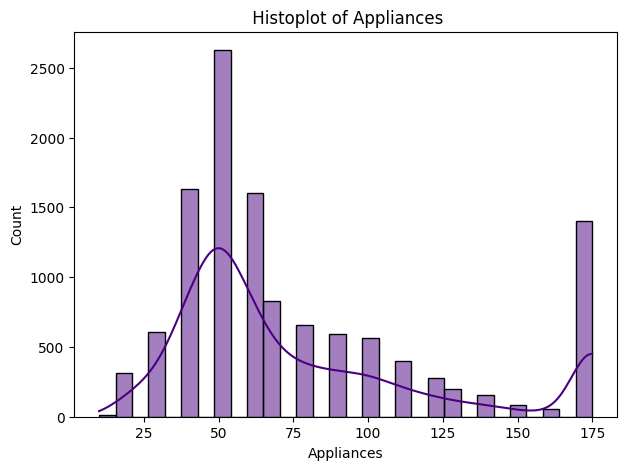

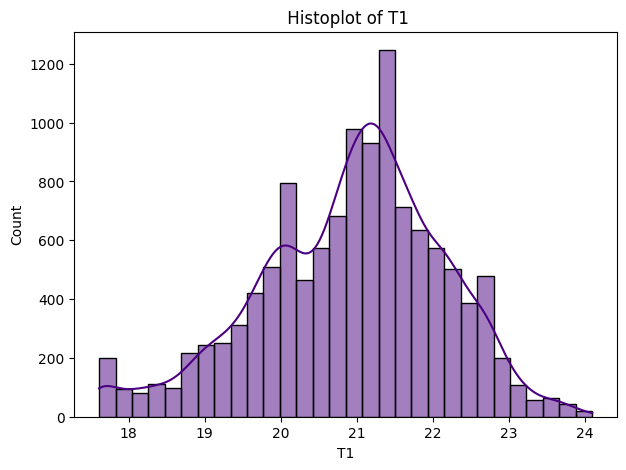

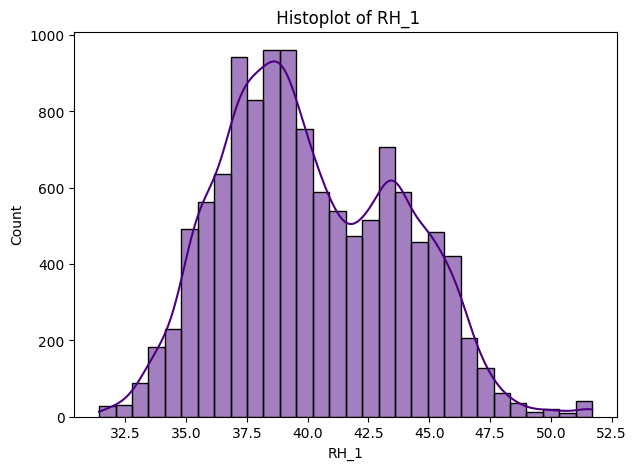

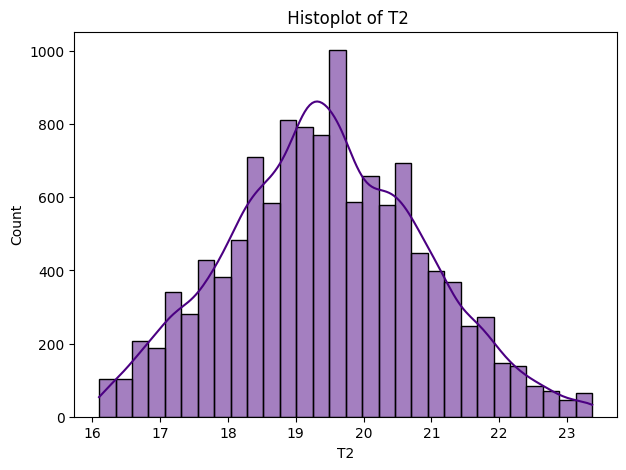

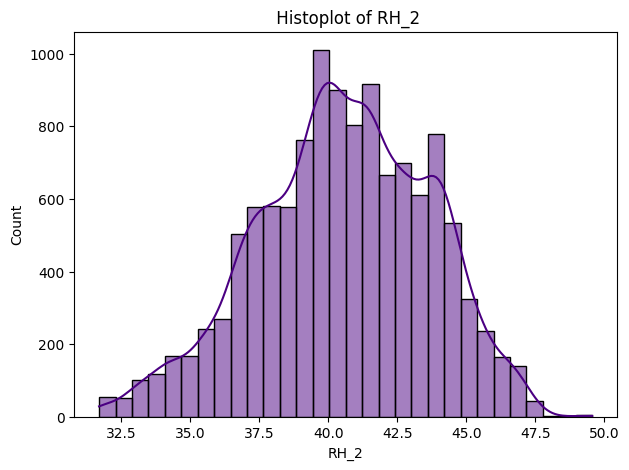

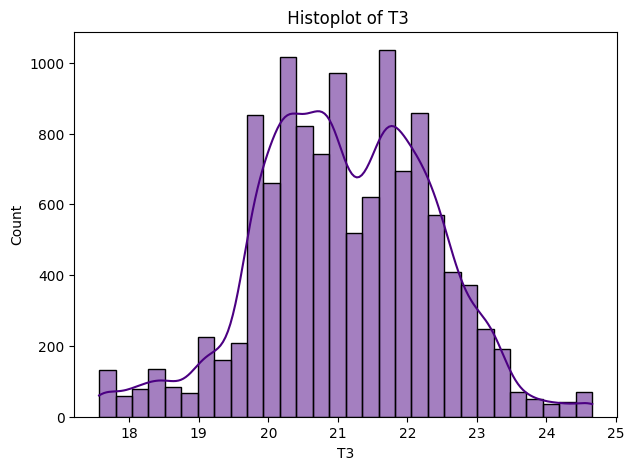

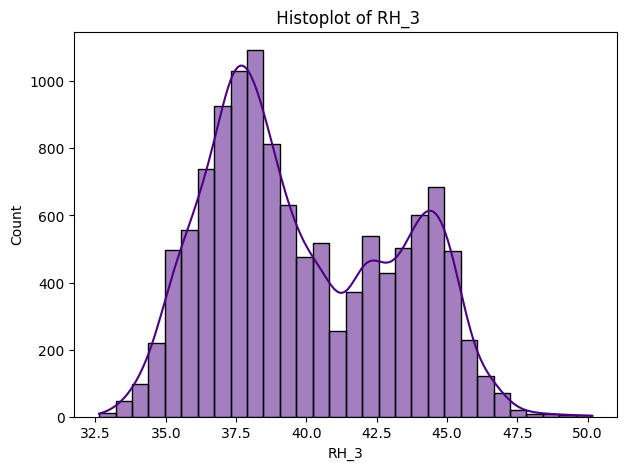

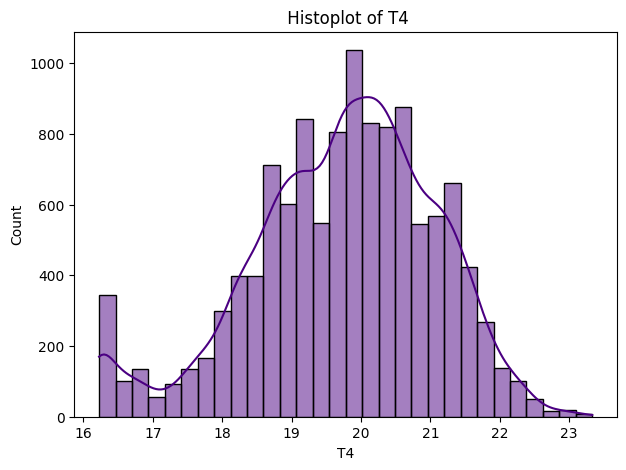

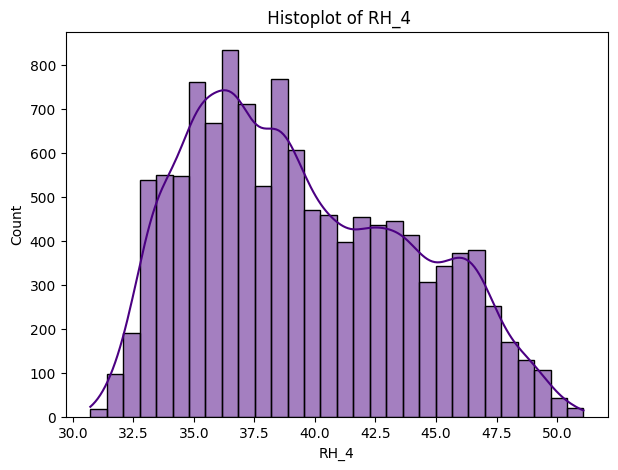

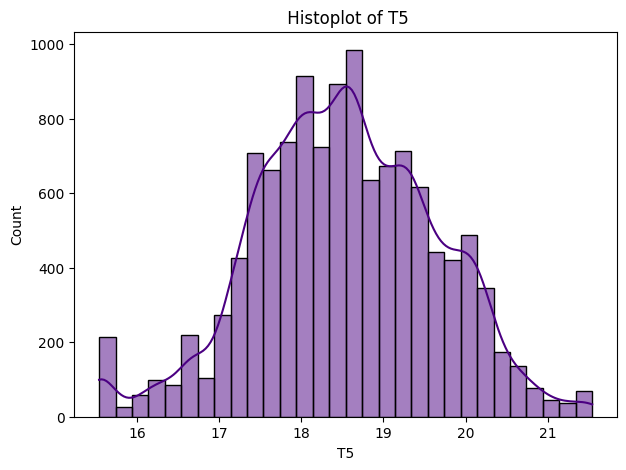

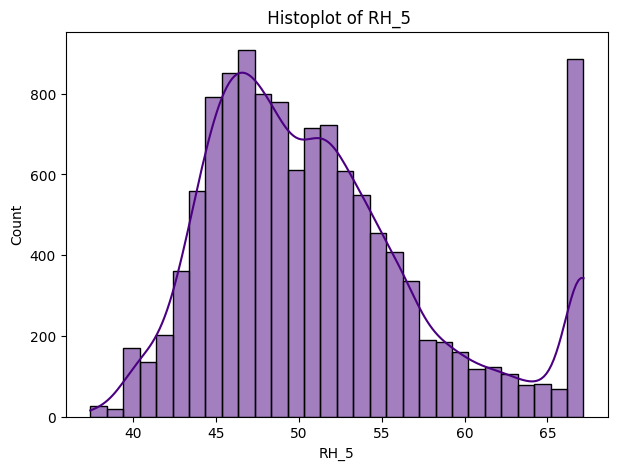

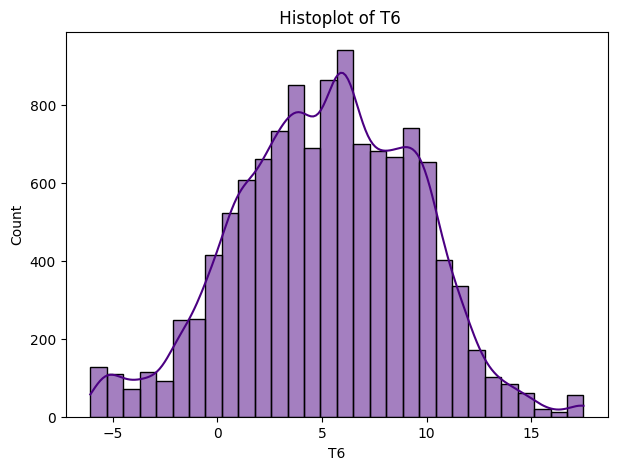

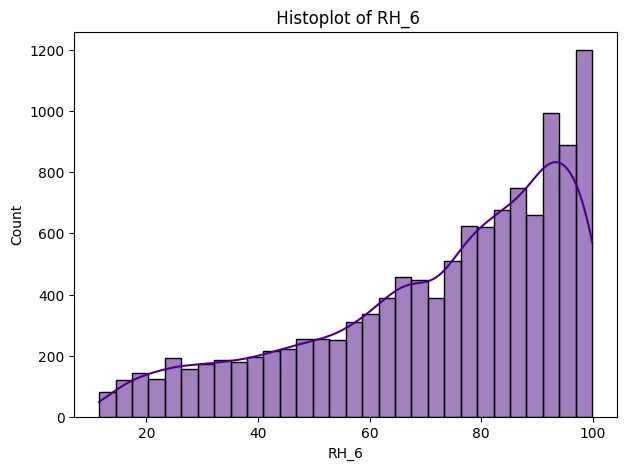

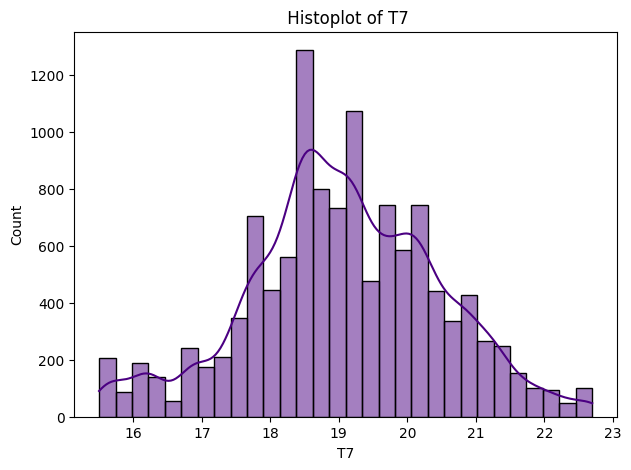

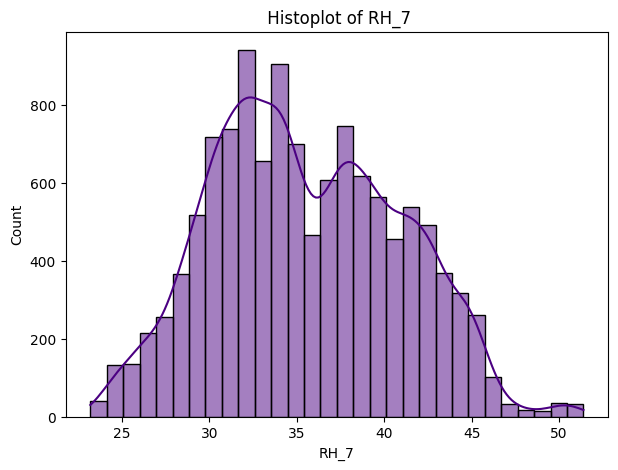

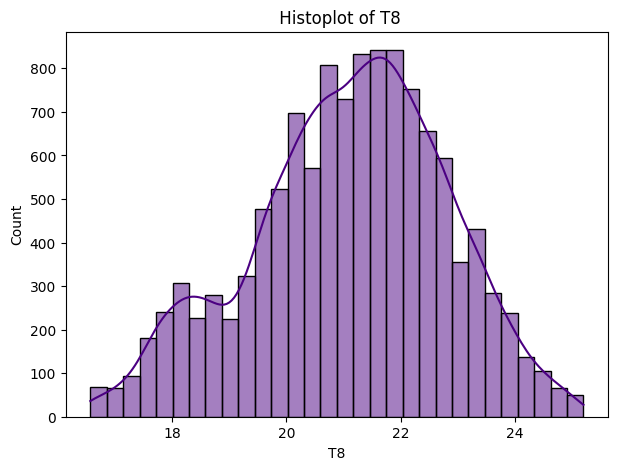

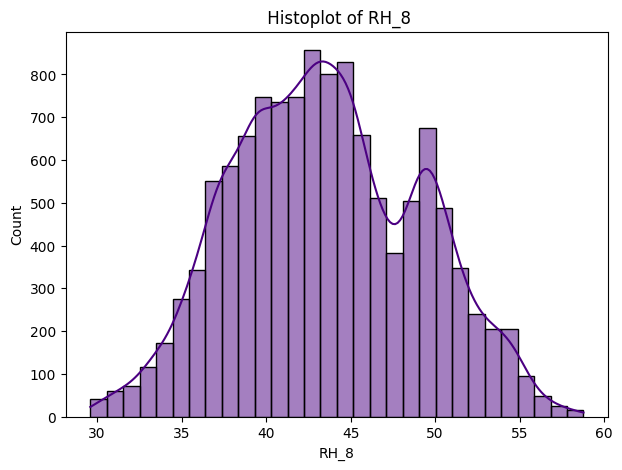

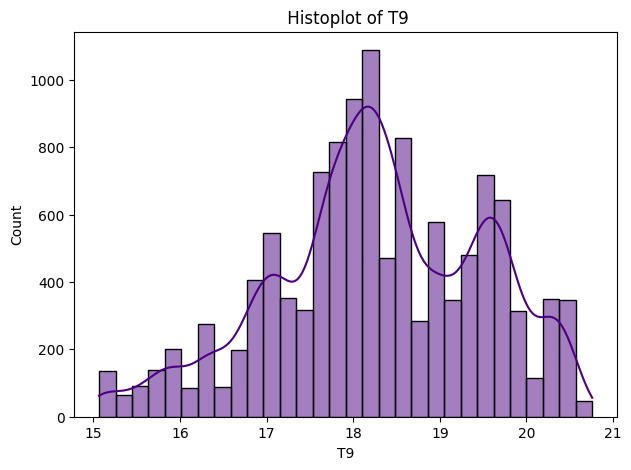

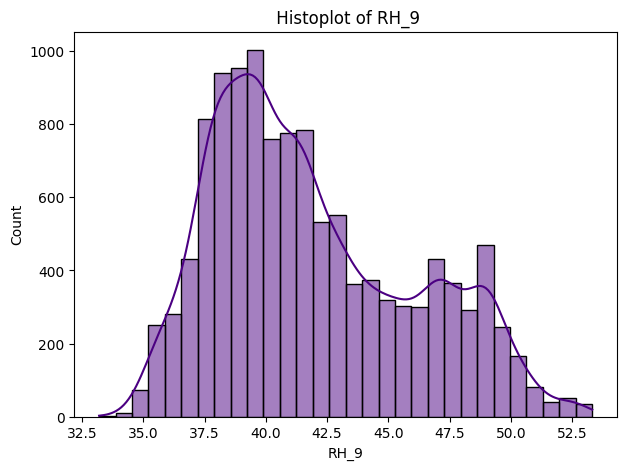

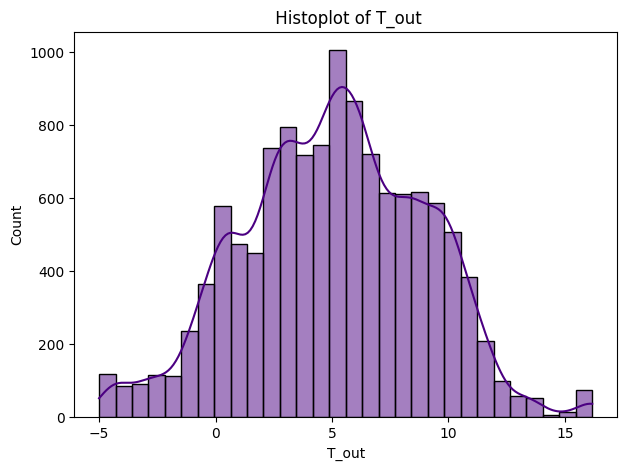

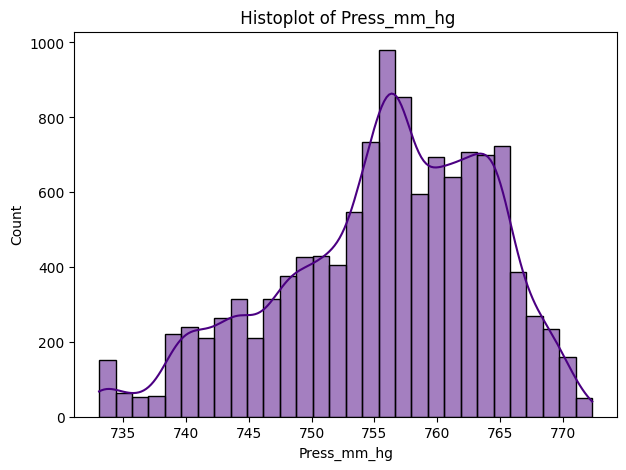

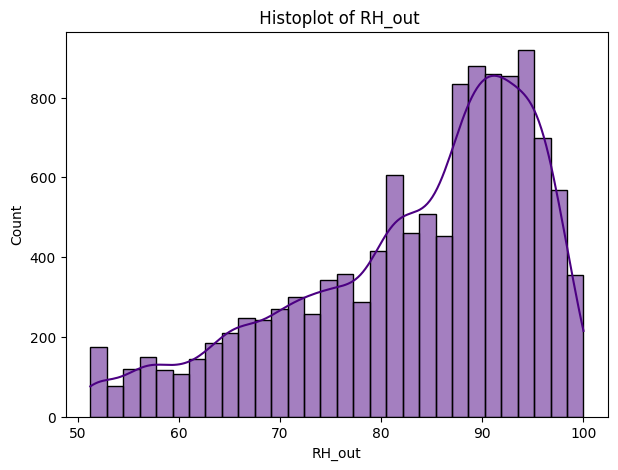

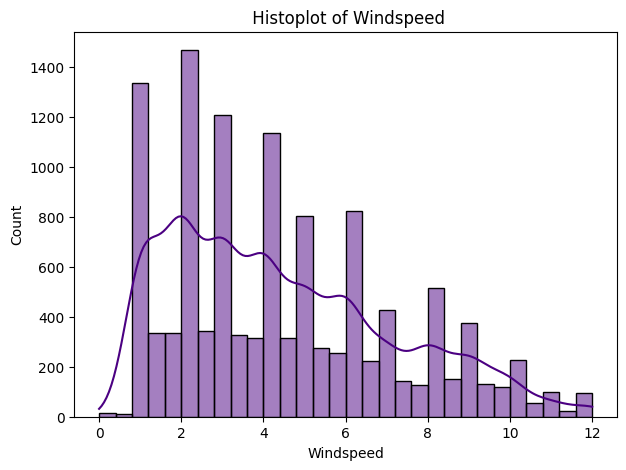

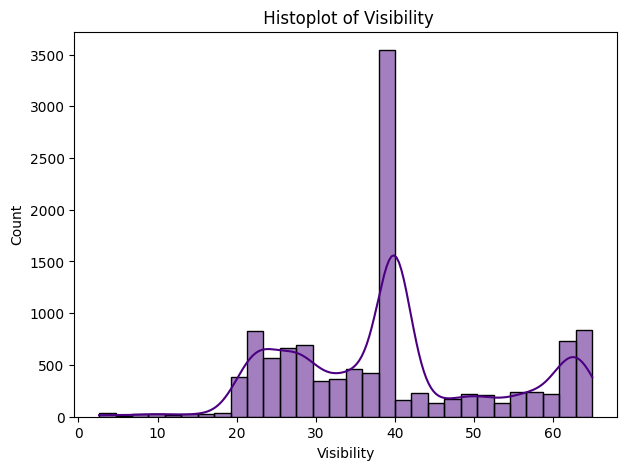

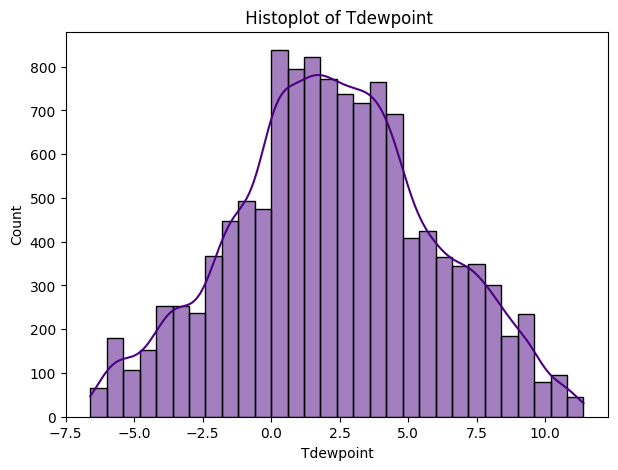

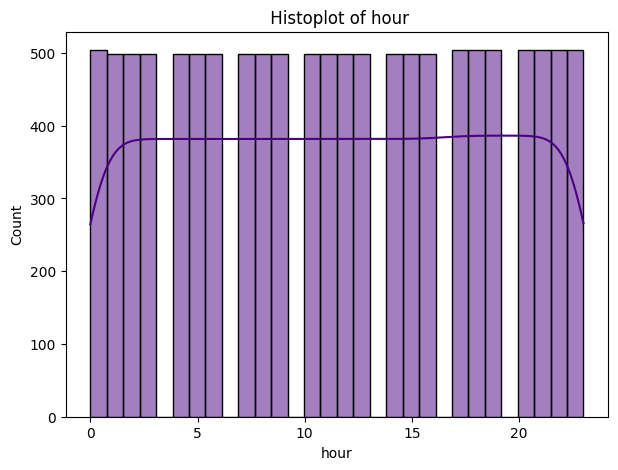

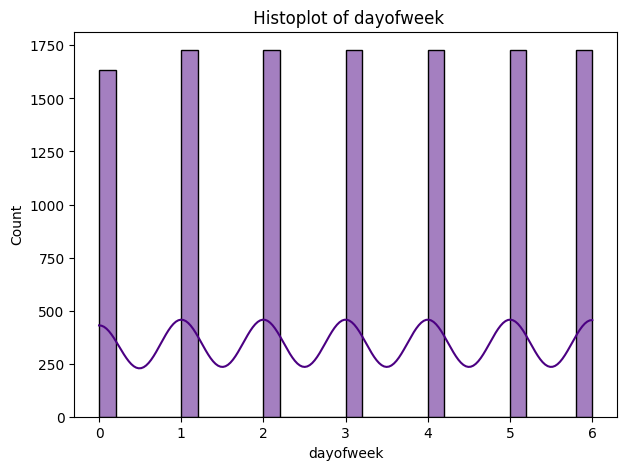

In [107]:
# Checking the distribution of Numerical columns

for col in numerical_df.columns:
    plt.figure(figsize=(7,5))
    sns.histplot(numerical_df[col], bins = 30, kde = True,color = 'indigo')
    plt.title(f' Histoplot of {col}')
    plt.show()

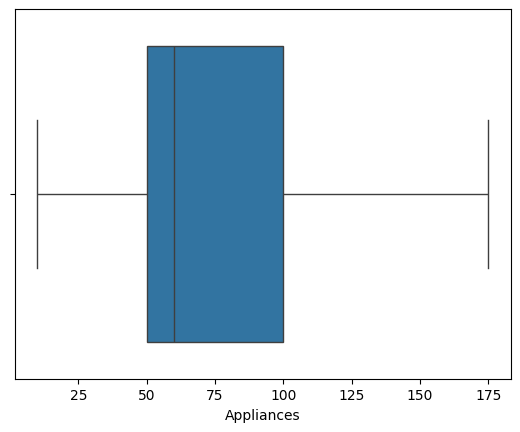

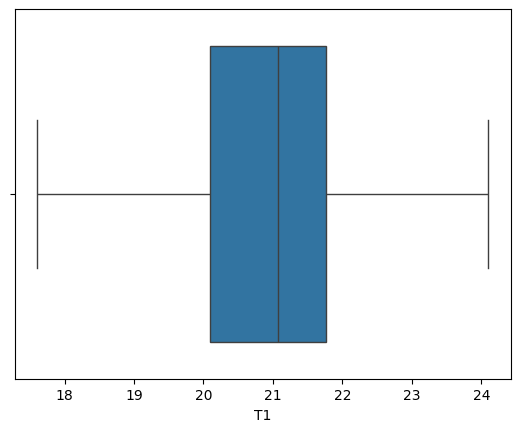

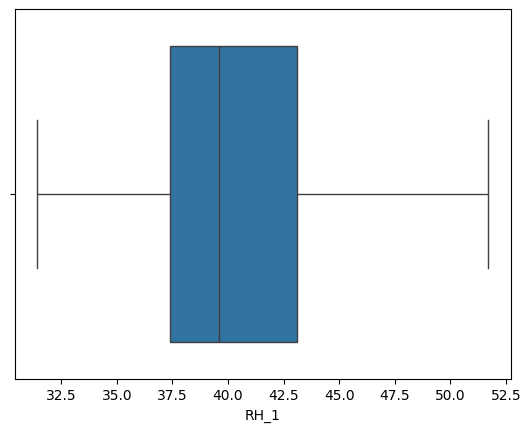

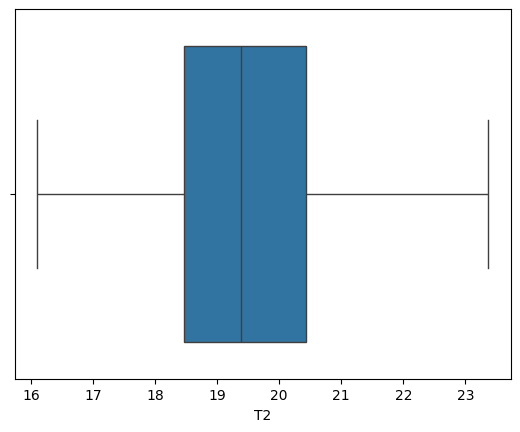

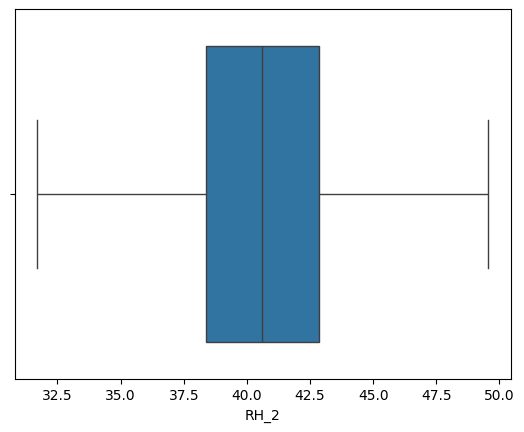

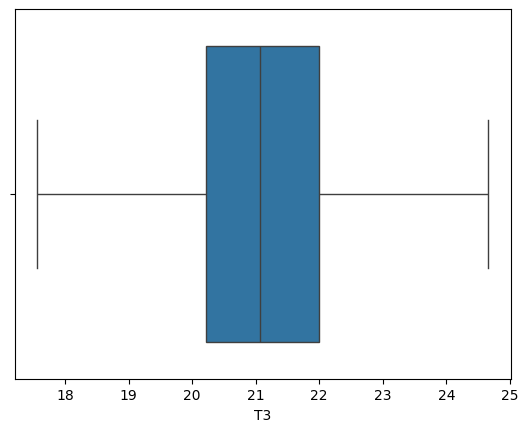

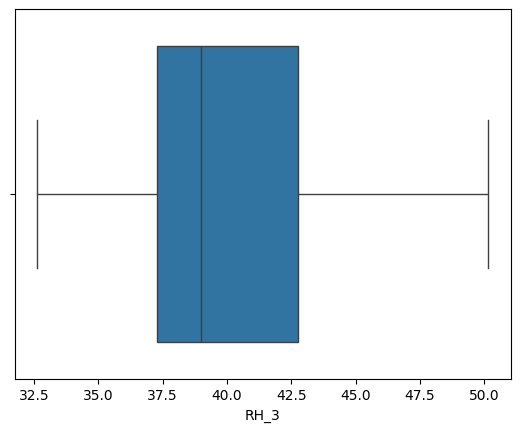

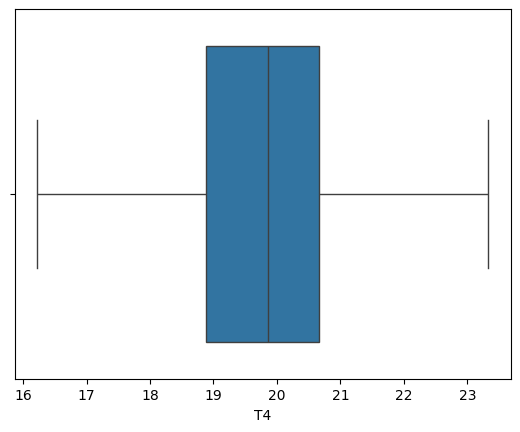

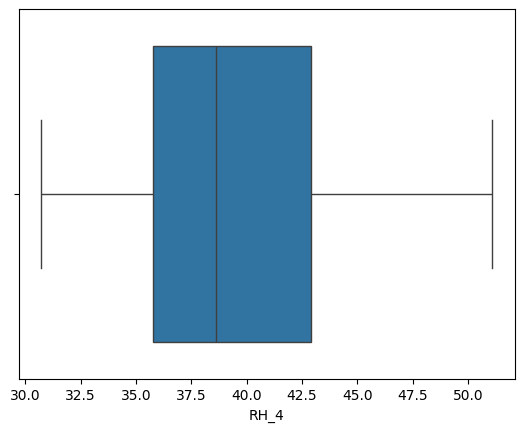

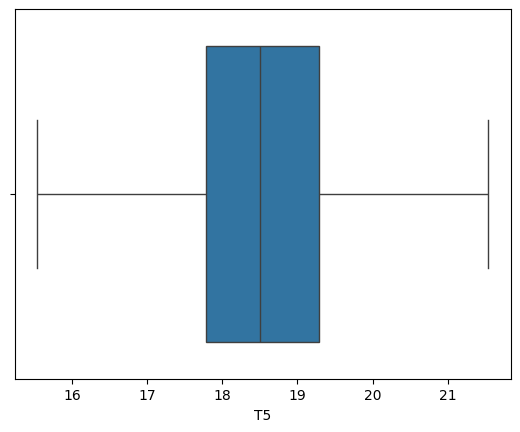

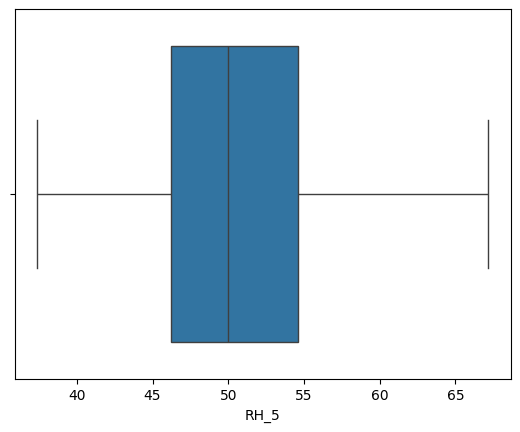

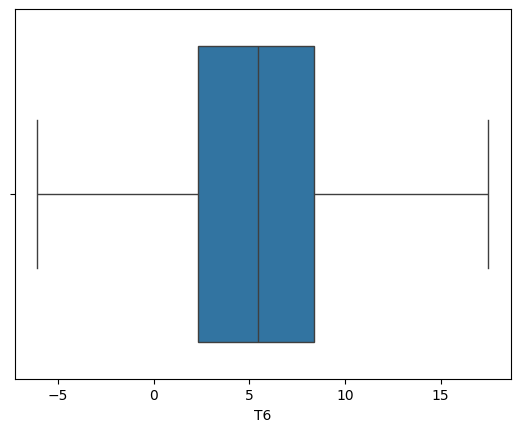

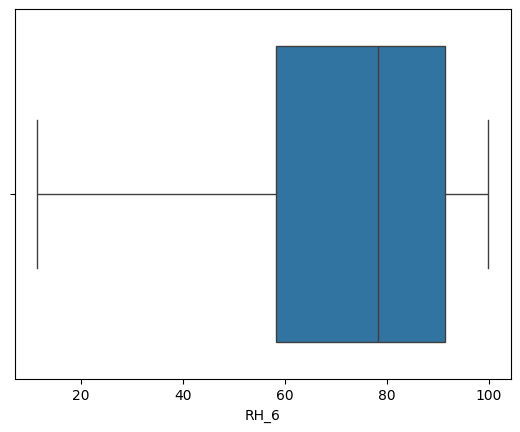

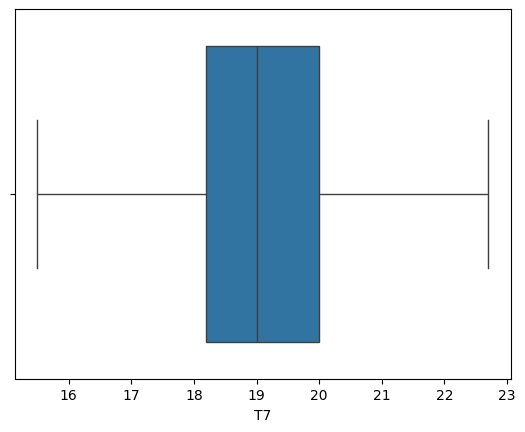

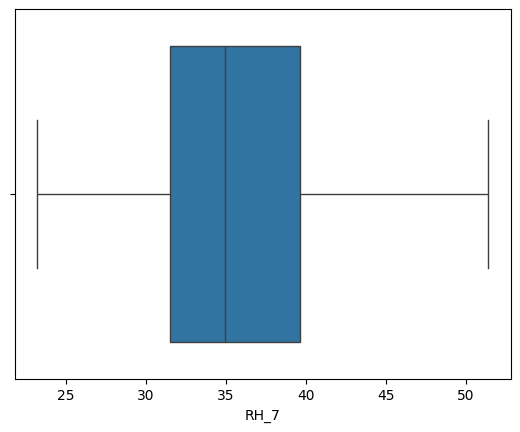

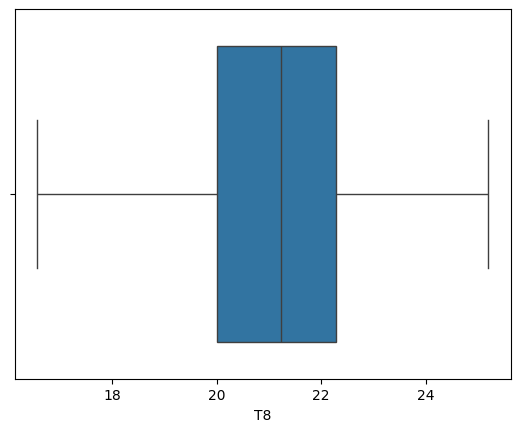

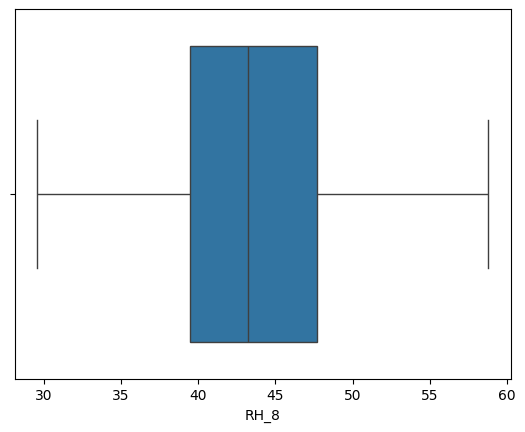

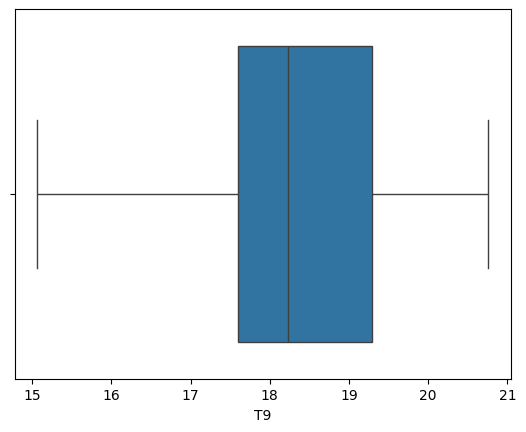

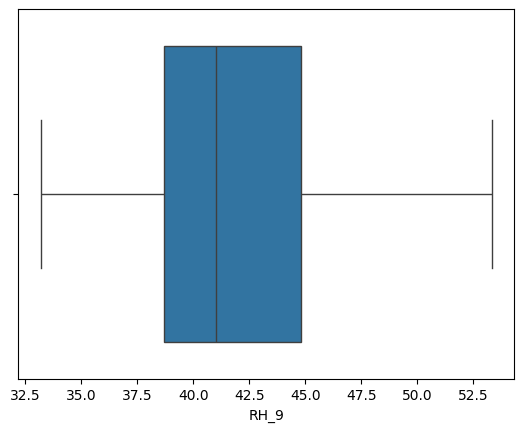

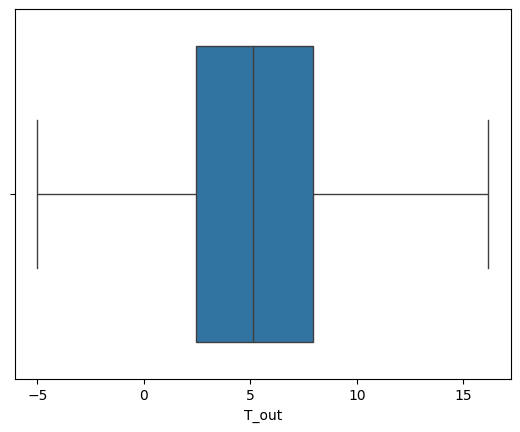

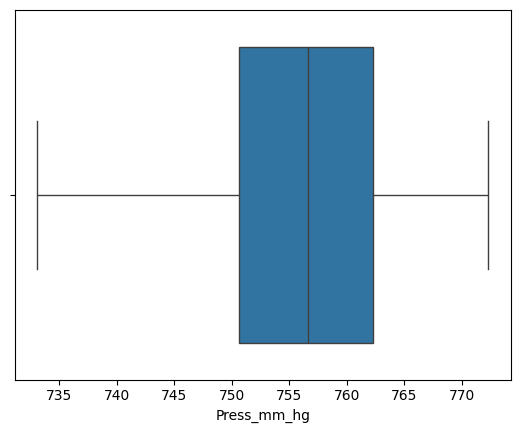

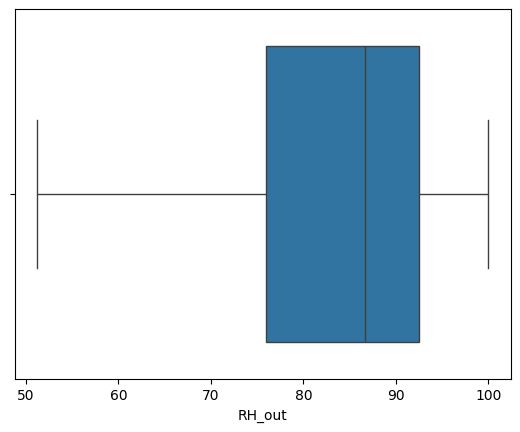

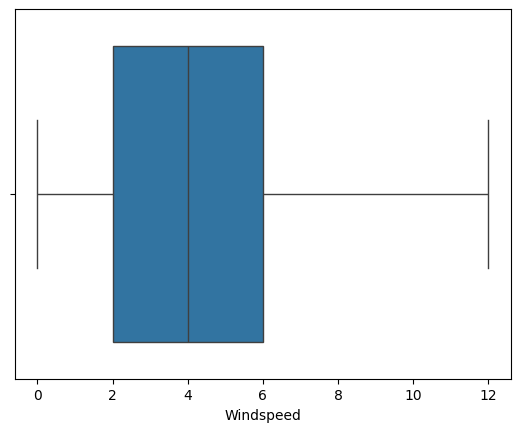

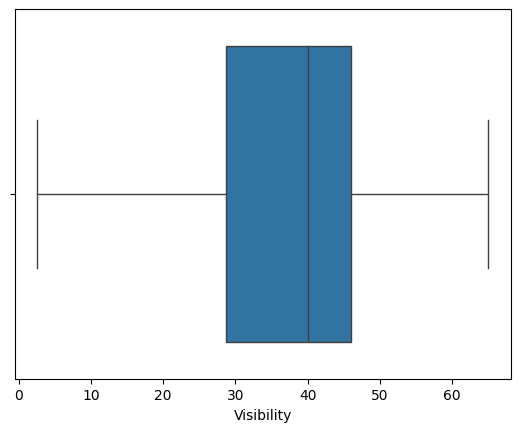

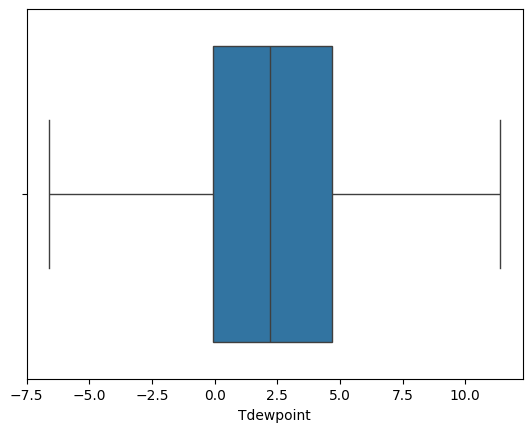

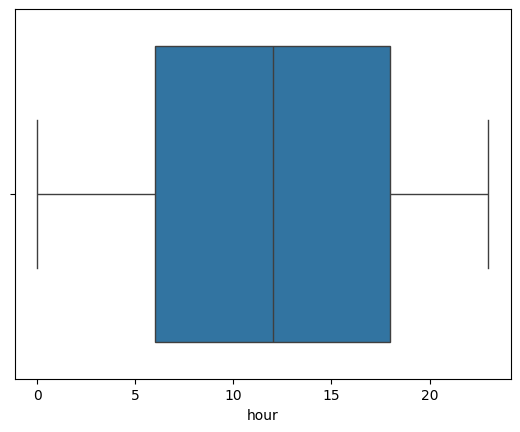

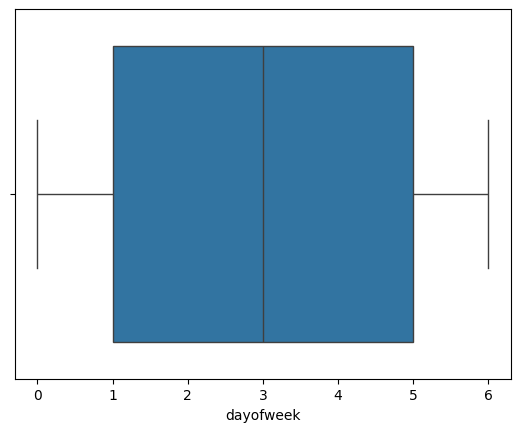

In [108]:
# Checking for Outliers
for i in numerical_df.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [109]:
# IQR Method
def outliers(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)

        # Capping
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

    return df

In [110]:
# Calling the function
df1 = outliers(df)

In [111]:
df1

Appliances         T1       RH_1     T2       RH_2     T3       RH_3  \
0            60.0  19.890000  47.596667  19.20  44.790000  19.79  44.730000   
1            60.0  19.890000  46.693333  19.20  44.722500  19.79  44.790000   
2            50.0  19.890000  46.300000  19.20  44.626667  19.79  44.933333   
3            50.0  19.890000  46.066667  19.20  44.590000  19.79  45.000000   
4            60.0  19.890000  46.333333  19.20  44.530000  19.79  45.000000   
...           ...        ...        ...    ...        ...    ...        ...   
11995        60.0  22.033333  44.530000  20.79  45.290000  23.00  41.790000   
11996        50.0  22.000000  44.466667  20.73  45.400000  23.00  41.790000   
11997        70.0  22.000000  44.466667  20.73  45.466667  23.00  41.790000   
11998        70.0  22.000000  44.450000  20.70  45.530000  23.00  41.790000   
11999        50.0  22.000000  44.500000  20.70  45.590000  23.00  41.790000   

              T4       RH_4         T5  ...         T9   RH_9      T_out  \
0      19.000000  45.566667  17.166667  ...  17.033333  45.53   6.600000   
1      19.000000  45.992500  17.166667  ...  17.066667  45.56   6.483333   
2      18.926667  45.890000  17.166667  ...  17.000000  45.50   6.366667   
3      18.890000  45.723333  17.166667  ...  17.000000  45.40   6.250000   
4      18.890000  45.530000  17.200000  ...  17.000000  45.40   6.133333   
...          ...        ...        ...  ...        ...    ...        ...   
11995  21.166667  44.000000  19.790000  ...  20.323333  46.29  14.966667   
11996  21.100000  44.000000  19.790000  ...  20.323333  46.29  14.933333   
11997  21.100000  44.000000  19.790000  ...  20.390000  46.29  14.900000   
11998  21.100000  44.000000  19.790000  ...  20.323333  46.23  14.866667   
11999  21.100000  44.000000  19.790000  ...  20.390000  46.20  14.833333   

       Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint  hour  \
0       733.500000  92.000000   7.000000   63.000000        5.3    17   
1       733.600000  92.000000   6.666667   59.166667        5.2    17   
2       733.700000  92.000000   6.333333   55.333333        5.1    17   
3       733.800000  92.000000   6.000000   51.500000        5.0    17   
4       733.900000  92.000000   5.666667   47.666667        4.9    17   
...            ...        ...        ...         ...        ...   ...   
11995   748.583333  76.166667   5.000000   38.166667       10.7     0   
11996   748.566667  76.333333   5.000000   36.333333       10.7     0   
11997   748.550000  76.500000   5.000000   34.500000       10.7     0   
11998   748.533333  76.666667   5.000000   32.666667       10.7     0   
11999   748.516667  76.833333   5.000000   30.833333       10.7     0   

       dayofweek  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
11995          0  
11996          0  
11997          0  
11998          0  
11999          0  

[12000 rows x 27 columns]

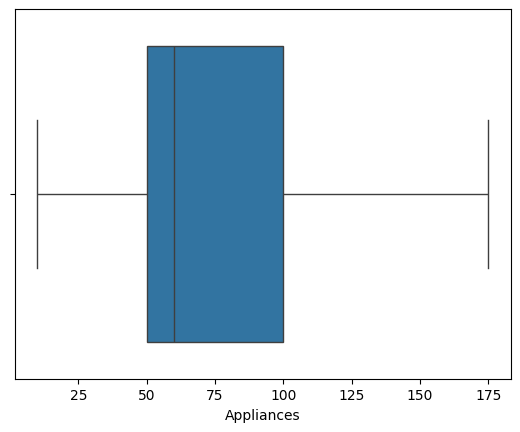

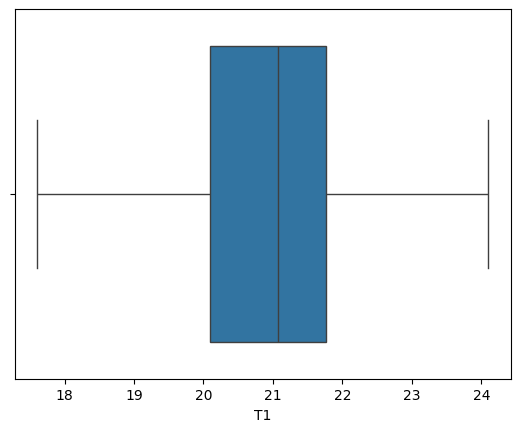

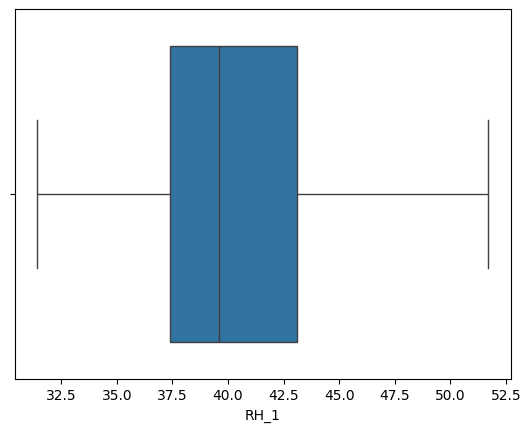

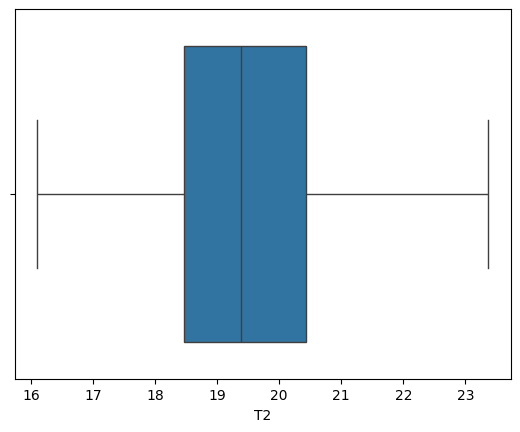

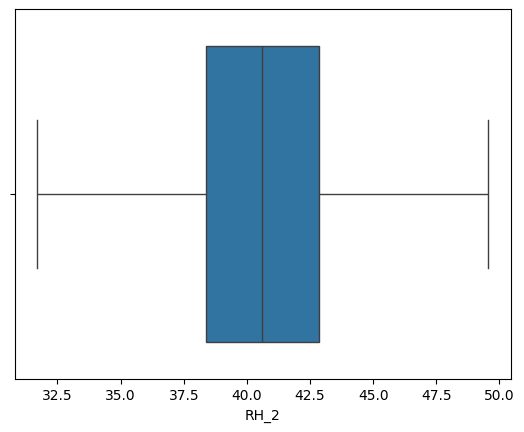

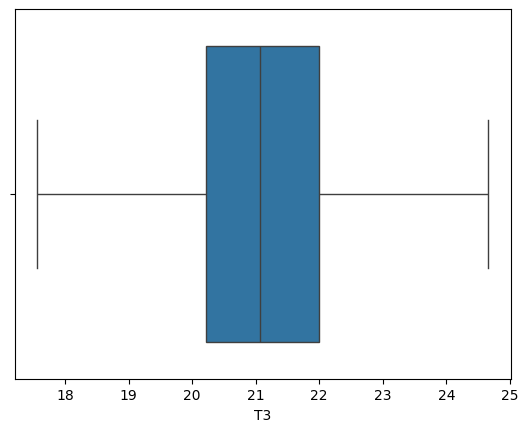

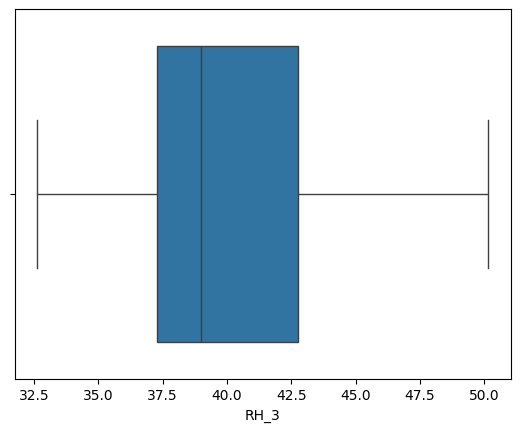

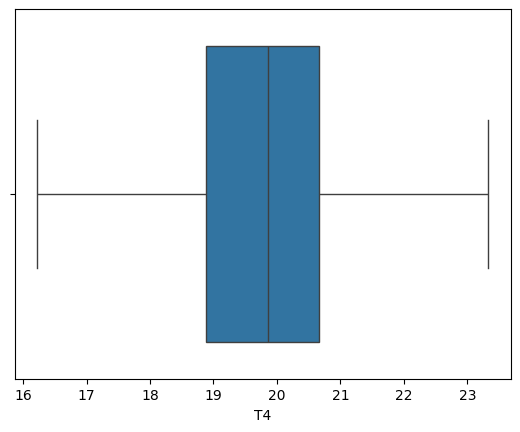

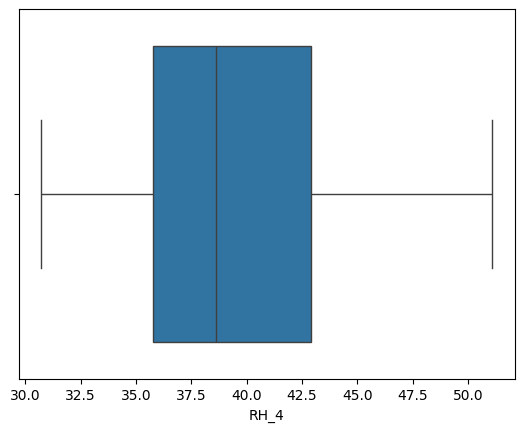

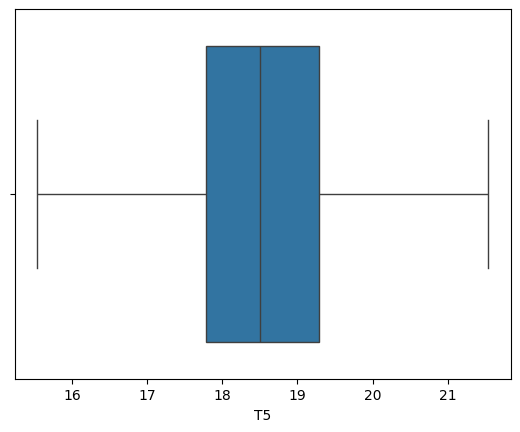

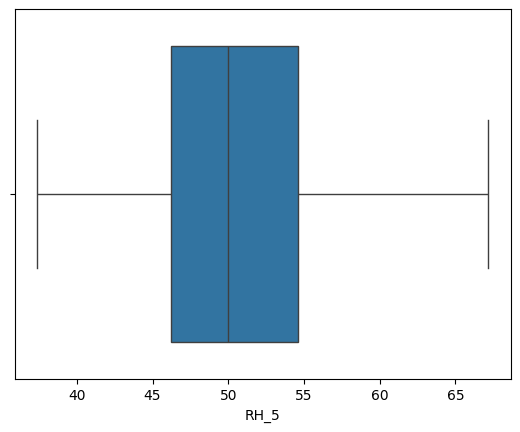

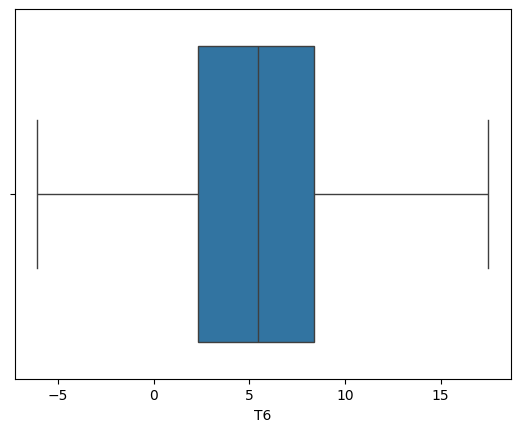

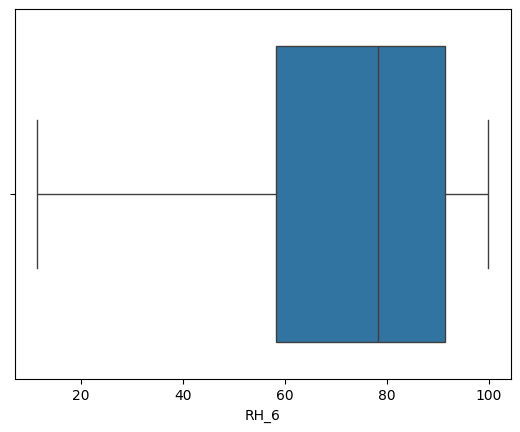

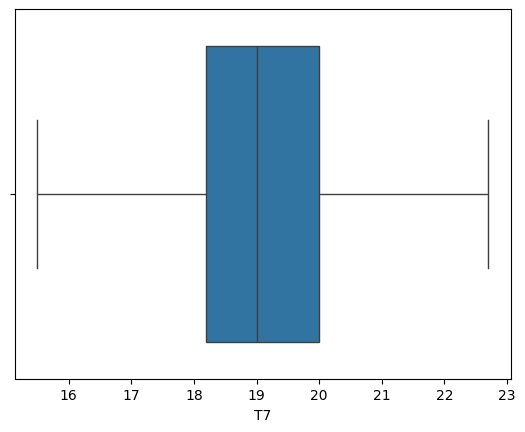

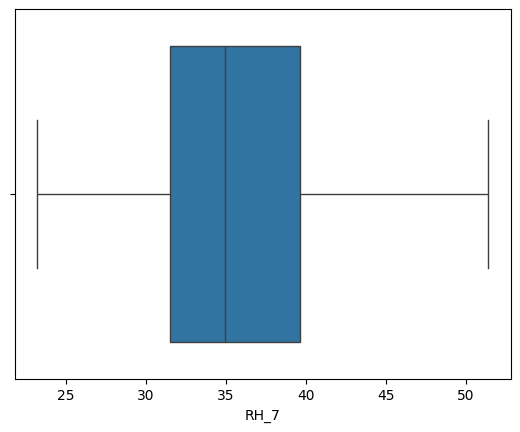

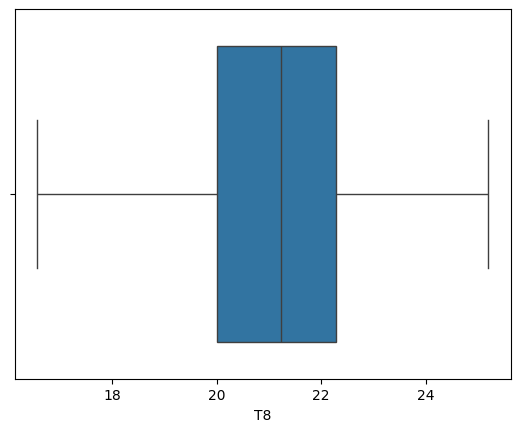

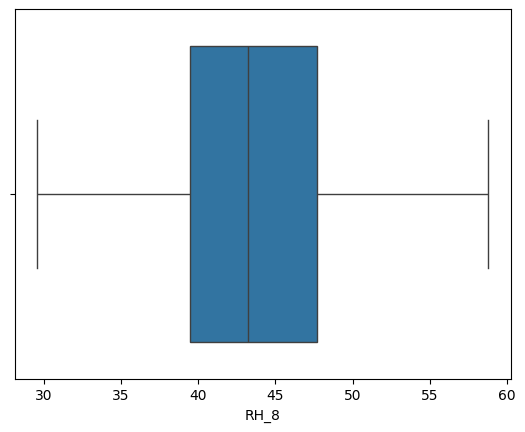

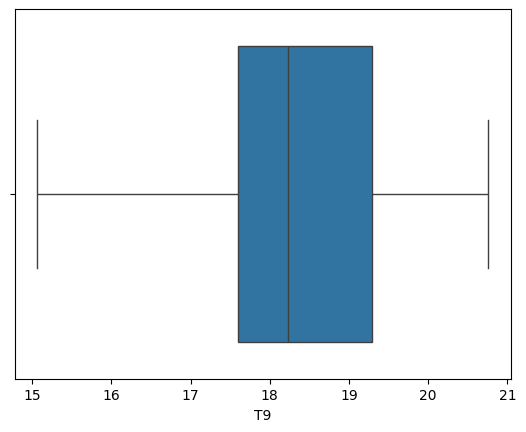

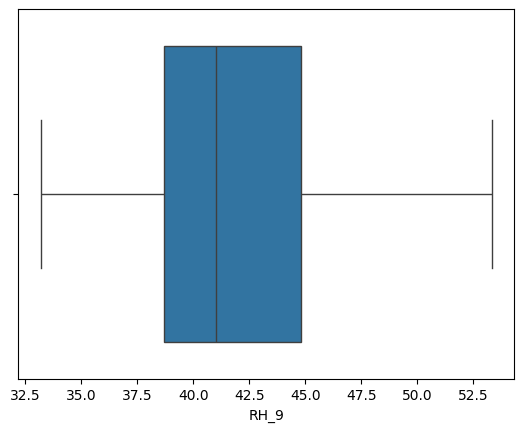

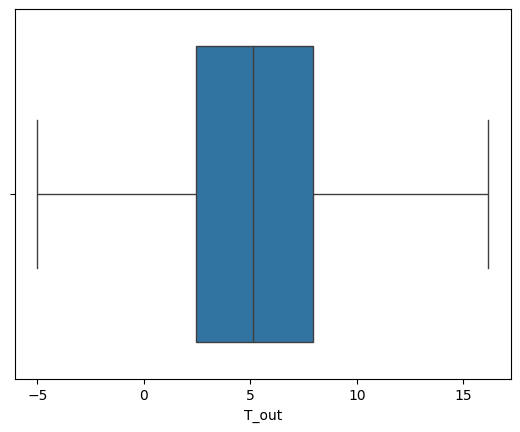

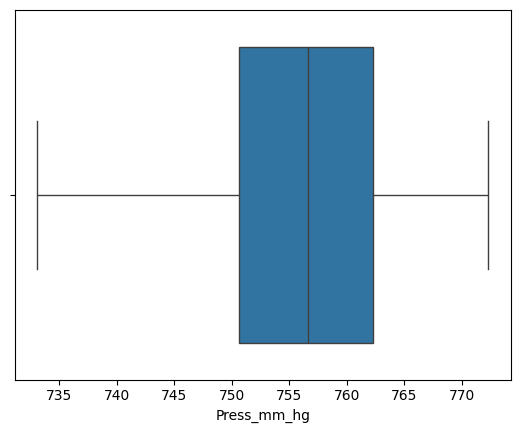

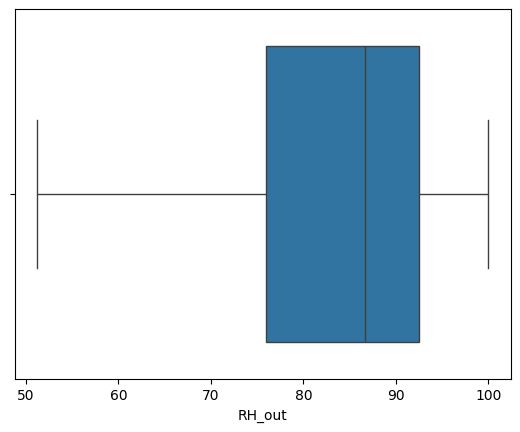

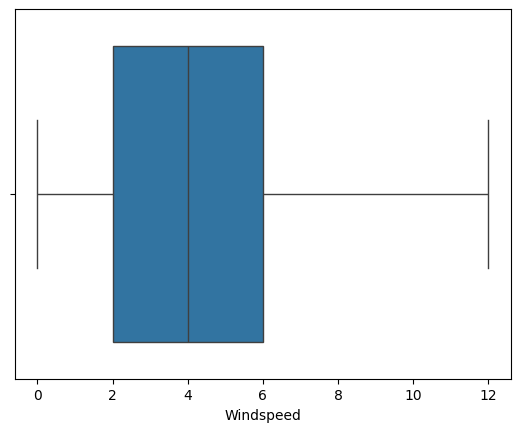

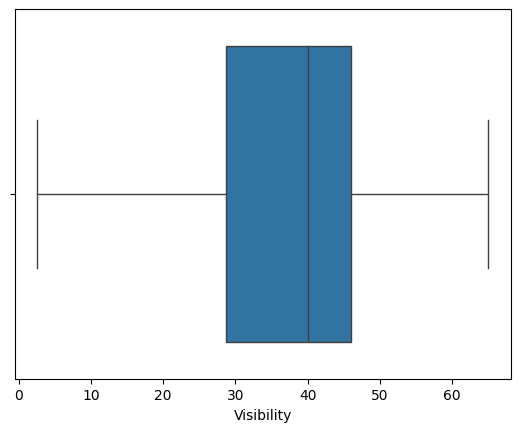

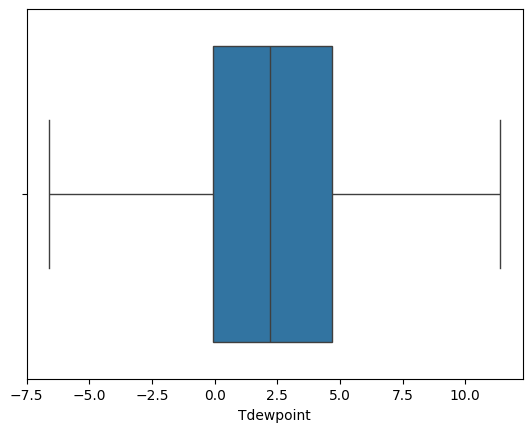

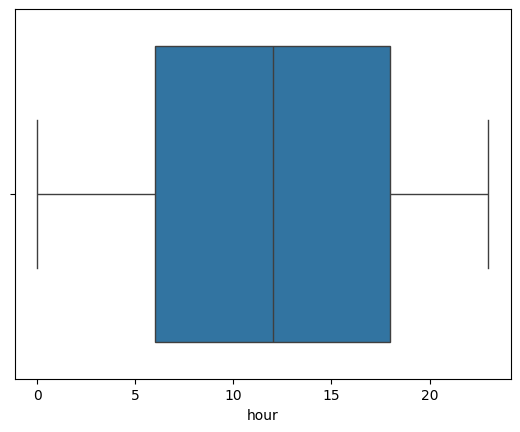

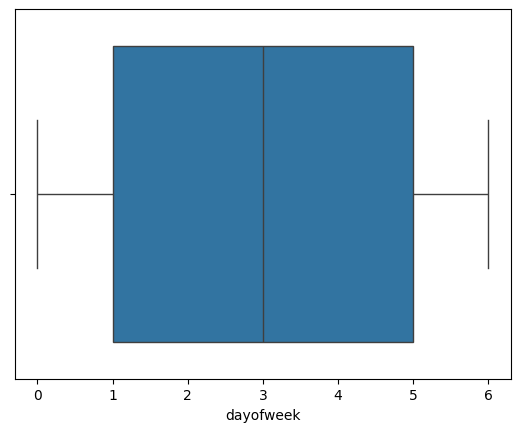

In [112]:
# Checking again to confirm there are no outliers
for i in numerical_df.columns:
    sns.boxplot(data=df1,x=i)
    plt.show()

A pairplot (short for "pairwise plot") is a useful data visualization tool in Python, commonly created using the seaborn library. It helps in exploring relationships between multiple variables in a dataset by plotting pairwise scatterplots and histograms (or kernel density plots) in a grid format.

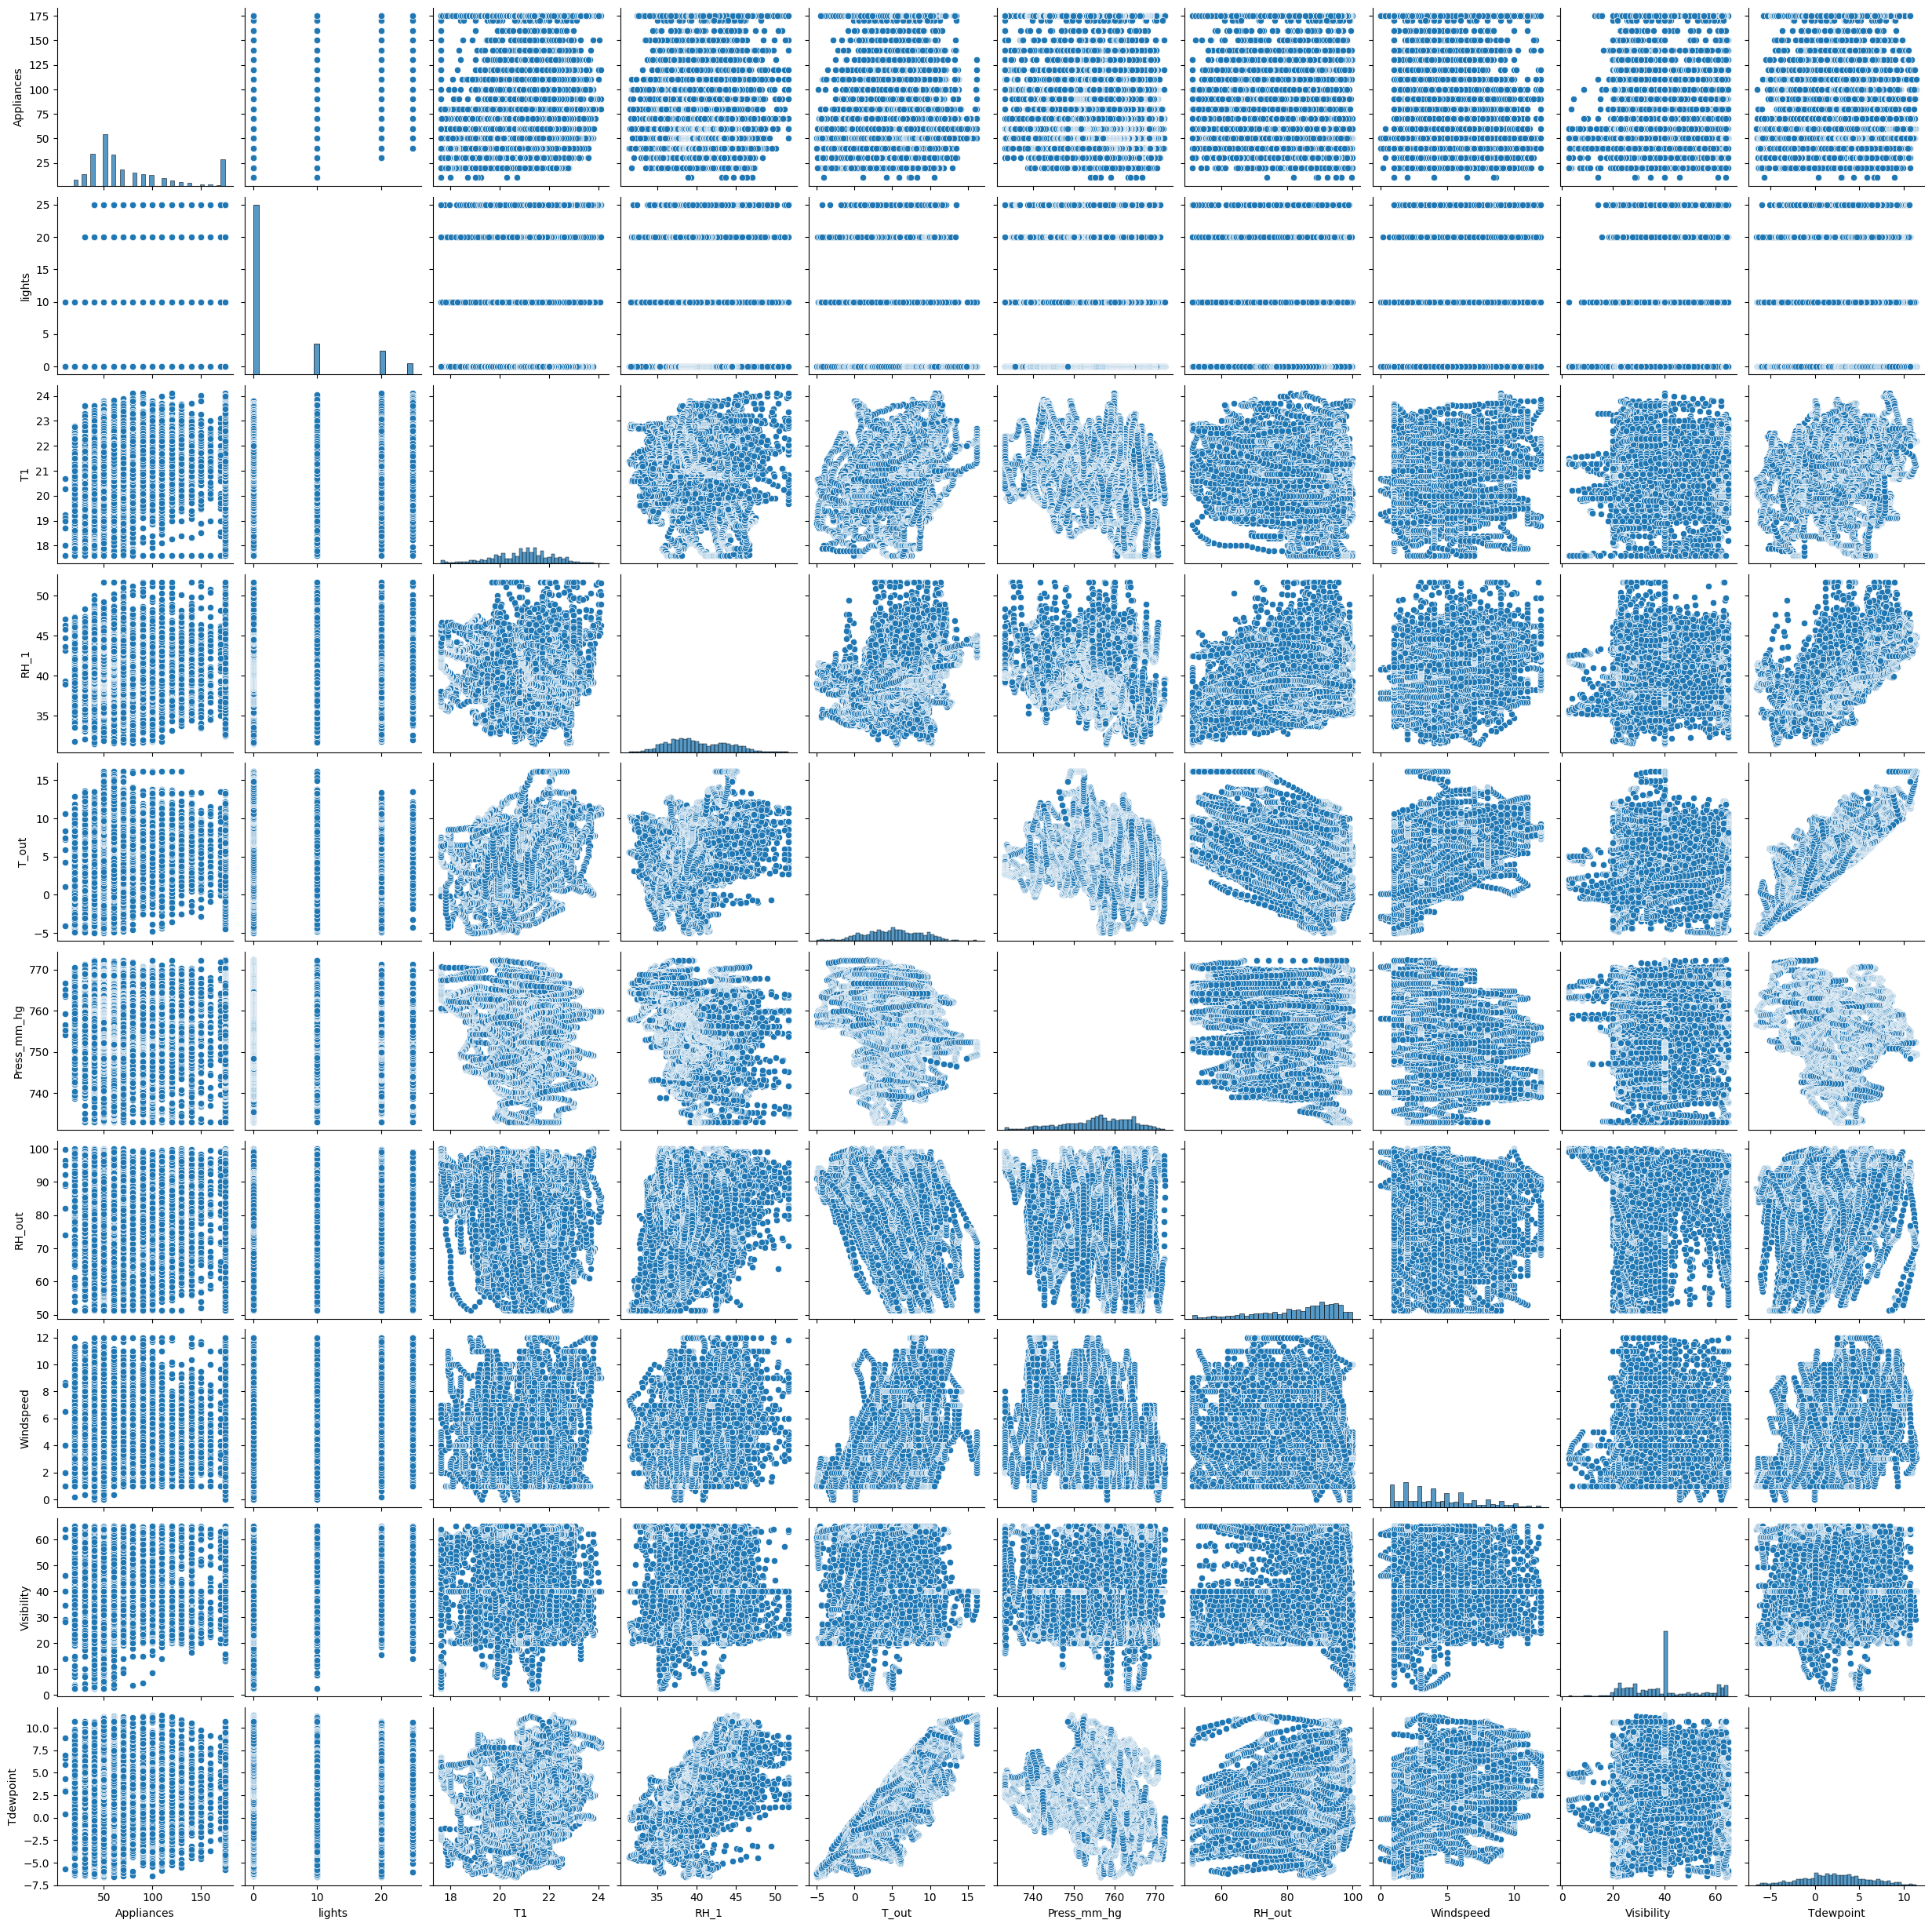

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'hour', 'dayofweek'],
      dtype='object')

In [113]:
# Pair Plot 
df1= data[['Appliances','lights','T1','RH_1','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint']]
sns.pairplot(df1, kind='scatter')
plt.show()
data.columns

### Skewness

Skewness measures the asymmetry of a probability distribution. It indicates whether data is concentrated more on one side of the mean than the other.

In [114]:
# Checking the skewness
numerical_df.skew()

Appliances     1.130252
T1            -0.406441
RH_1           0.314432
T2             0.111168
RH_2          -0.234362
T3            -0.120438
RH_3           0.348582
T4            -0.506693
RH_4           0.398739
T5            -0.100663
RH_5           0.831747
T6            -0.118191
RH_6          -0.809992
T7            -0.085517
RH_7           0.192589
T8            -0.275820
RH_8           0.127734
T9            -0.267308
RH_9           0.584109
T_out         -0.052082
Press_mm_hg   -0.545743
RH_out        -0.843704
Windspeed      0.666166
Visibility     0.333045
Tdewpoint      0.012093
hour          -0.005146
dayofweek     -0.008771
dtype: float64

In [115]:
X = df1.drop('Appliances', axis = 1)
Y = df1['Appliances']

In [116]:
le = LabelEncoder()

In [117]:
df1['Appliances'] = le.fit_transform(df1['Appliances'])

C:\Users\joann\AppData\Local\Temp\ipykernel_21948\860654021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Appliances'] = le.fit_transform(df1['Appliances'])


In [118]:
## Handling Skewness
pt = PowerTransformer(method= 'yeo-johnson')

In [119]:
numerical_columns = df1.select_dtypes(include='number').columns

In [120]:
numerical_columns = [i for i in numerical_columns if i in X.columns]

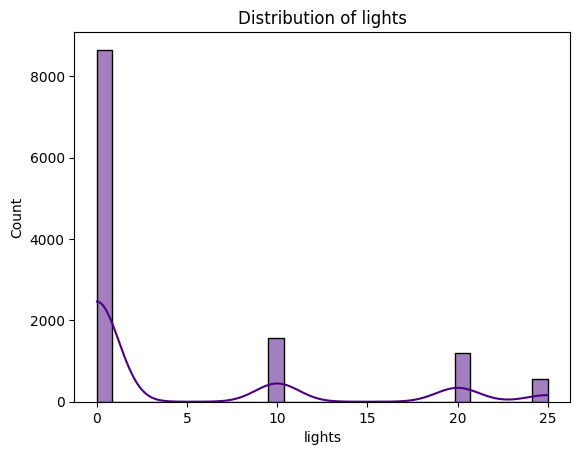

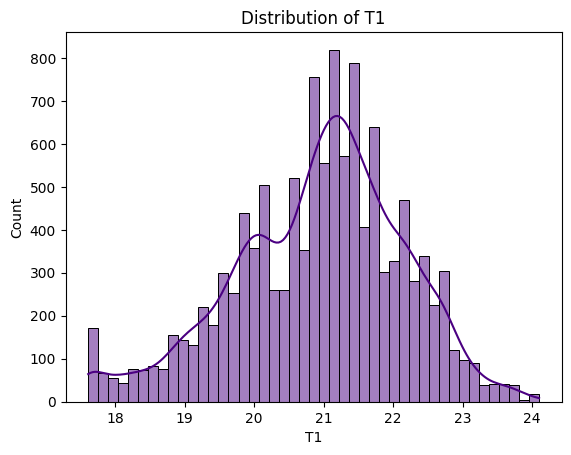

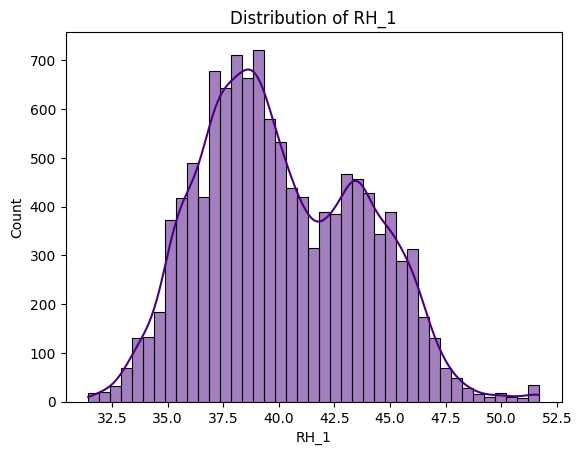

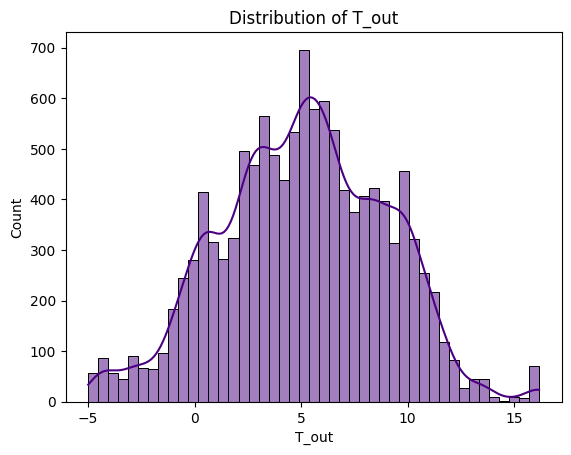

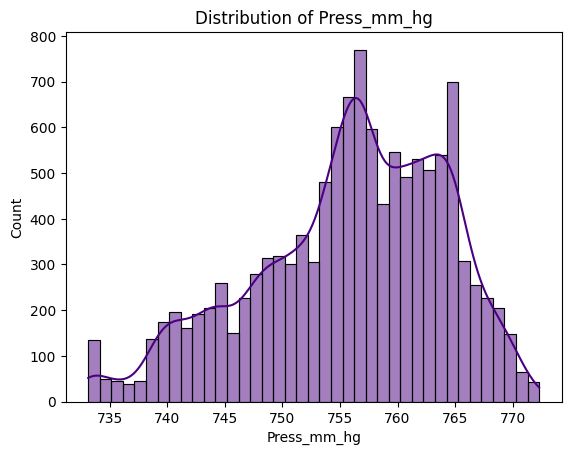

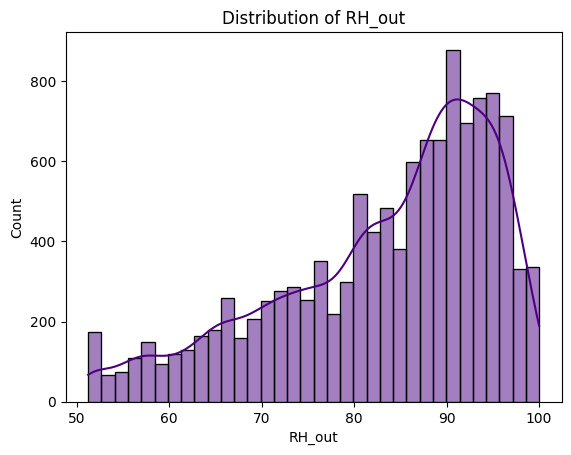

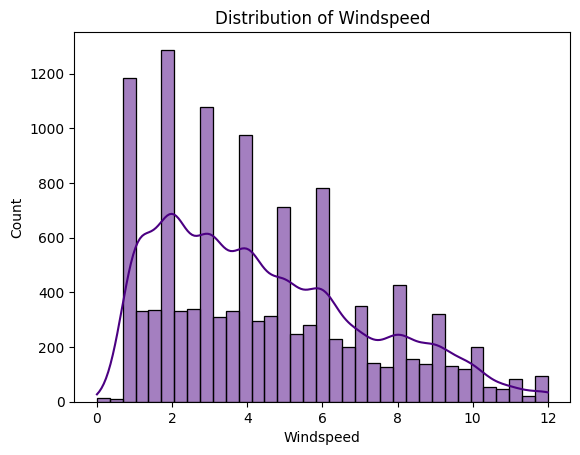

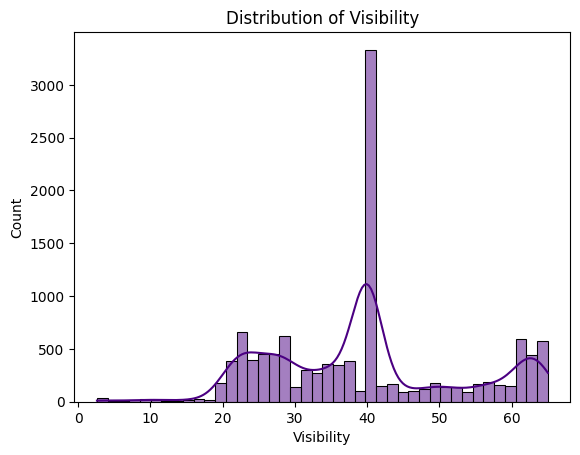

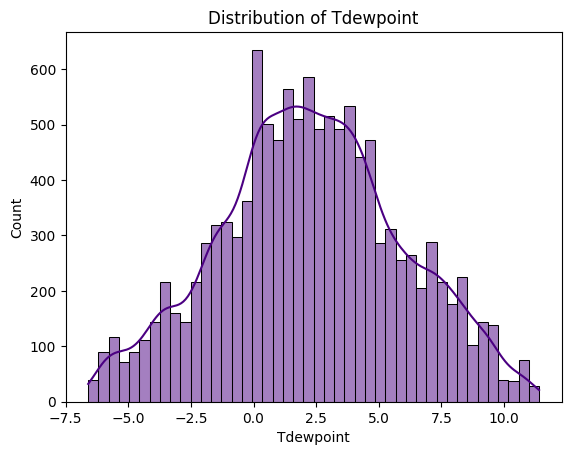

In [121]:
for i in numerical_columns:
    sns.histplot(data=X, x=i, kde=True,color = 'indigo')  # kde=True adds a kernel density estimation
    plt.title(f"Distribution of {i}")
    plt.show()

### FEATURE SELECTION

This involves choosing the most relevant features for prediction to reduce overfitting and improve model accuracy. Techniques include:
Correlation matrix
Feature importance from models (e.g., Random Forest)
Recursive Feature Elimination (RFE)
Visualizing correlation
Correlation measures the strength and direction of the linear relationship between two variables. It ranges from -1 to +1:
+1 → Perfect positive correlation (both increase together)
0 → No linear correlation
–1 → Perfect negative correlation (one increases, the other decreases)
In this project, correlation helps identify which features are strongly related to appliance energy consumption, guiding feature selection and improving model accuracy.

In [122]:
cor = df1.corr()

In [123]:
cor

Appliances    lights        T1      RH_1     T_out  Press_mm_hg  \
Appliances     1.000000  0.332083  0.164880  0.068446  0.109226    -0.064544   
lights         0.332083  1.000000  0.160908  0.160790  0.024451    -0.015580   
T1             0.164880  0.160908  1.000000  0.001991  0.325828    -0.128372   
RH_1           0.068446  0.160790  0.001991  1.000000  0.430556    -0.191742   
T_out          0.109226  0.024451  0.325828  0.430556  1.000000    -0.112916   
Press_mm_hg   -0.064544 -0.015580 -0.128372 -0.191742 -0.112916     1.000000   
RH_out        -0.169530  0.031249 -0.140414  0.274297 -0.365320    -0.075106   
Windspeed      0.058328  0.025384  0.080433  0.378373  0.519727    -0.286518   
Visibility    -0.023762 -0.001163 -0.030997 -0.010946 -0.066814     0.031980   
Tdewpoint      0.013443  0.046018  0.254749  0.623155  0.823535    -0.164974   

               RH_out  Windspeed  Visibility  Tdewpoint  
Appliances  -0.169530   0.058328   -0.023762   0.013443  
lights       0.031249   0.025384   -0.001163   0.046018  
T1          -0.140414   0.080433   -0.030997   0.254749  
RH_1         0.274297   0.378373   -0.010946   0.623155  
T_out       -0.365320   0.519727   -0.066814   0.823535  
Press_mm_hg -0.075106  -0.286518    0.031980  -0.164974  
RH_out       1.000000  -0.199684    0.172211   0.223460  
Windspeed   -0.199684   1.000000   -0.058417   0.425502  
Visibility   0.172211  -0.058417    1.000000   0.033476  
Tdewpoint    0.223460   0.425502    0.033476   1.000000

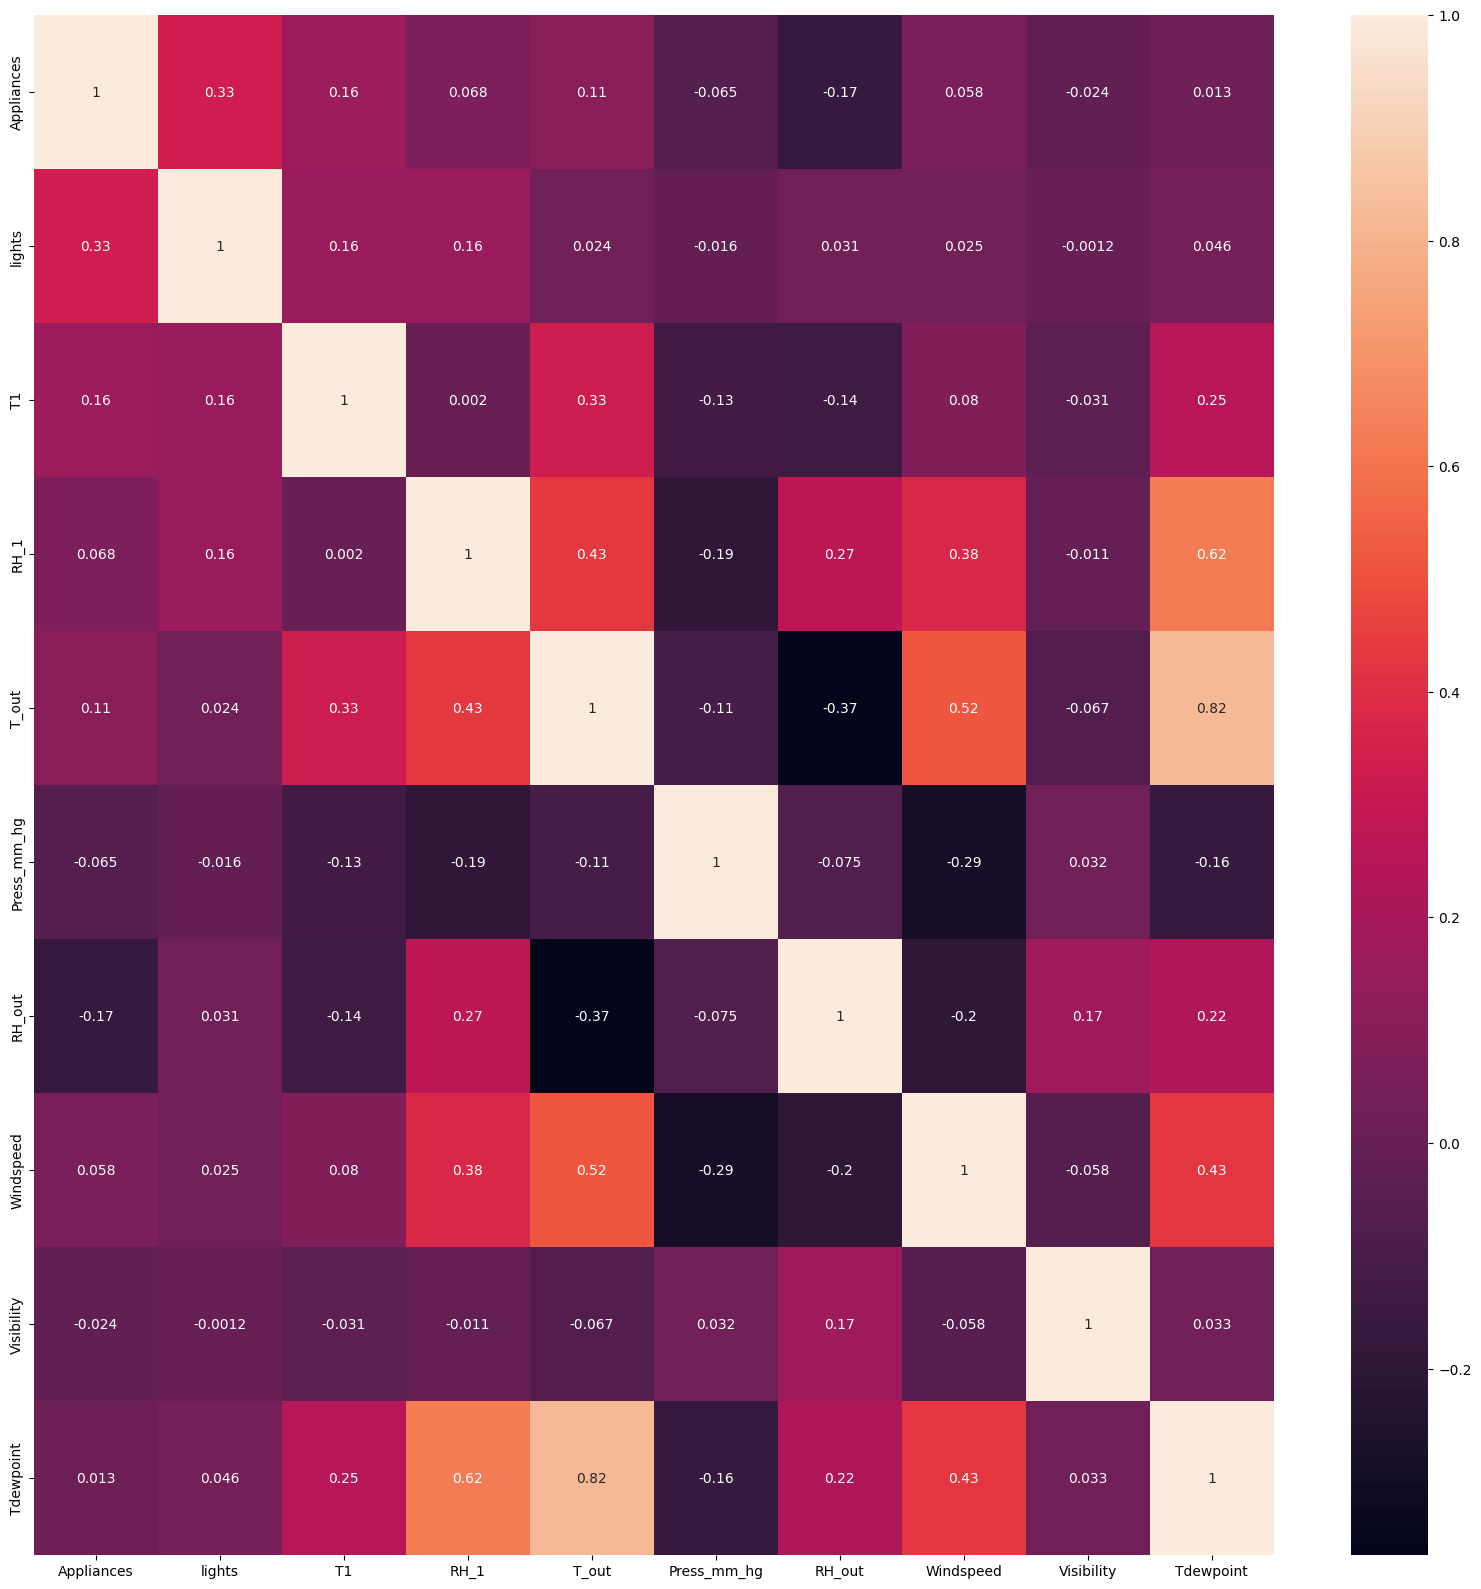

In [124]:
# Plotting the Heat map
# Explore the relationship between features: 

# compute the correlation matrix
corr_matrix = df1.corr()

# create the heatmap with a larger size
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap='rocket', annot=True)

# show the plot
plt.show()

### Target distribution

The target distribution refers to how the values of your dependent variable (Y) are spread across different ranges. Understanding it is crucial because:

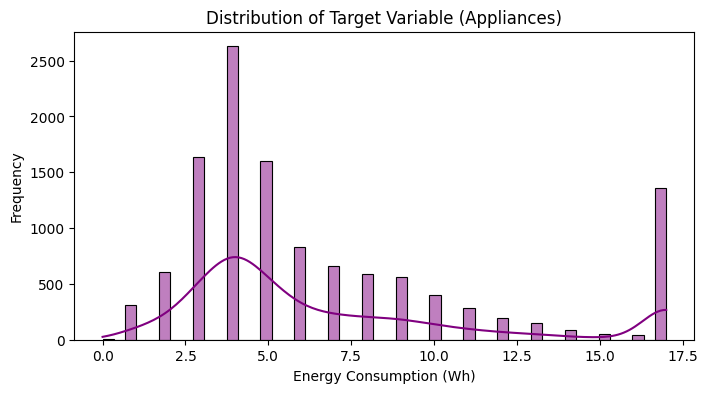

In [125]:
# Shows skewness and spread of the target variable.
# Plotting Histogram

plt.figure(figsize=(8, 4))
sns.histplot(df1['Appliances'], bins=50, kde=True,color = 'purple')
plt.title("Distribution of Target Variable (Appliances)")
plt.xlabel("Energy Consumption (Wh)")
plt.ylabel("Frequency")
plt.show()

In [126]:
sk = SelectKBest(score_func= f_regression, k=10 )

In [127]:
k_best = sk.fit_transform(X,Y)

C:\Users\joann\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=9. All the features will be returned.
  warnings.warn(


In [128]:
selected_features = X.columns[sk.get_support()]

In [129]:
selected_features

Index(['lights', 'T1', 'RH_1', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint'],
      dtype='object')

In [130]:
feature_score = pd.DataFrame({
    'Features' : X.columns,
    'Score' : sk.scores_}).sort_values(by= 'Score',ascending=False)

In [131]:
feature_score

Features        Score
0       lights  1520.339080
5       RH_out   360.084703
1           T1   354.176479
3        T_out   149.600070
2         RH_1    56.228177
4  Press_mm_hg    52.923201
6    Windspeed    40.187218
7   Visibility     7.023777
8    Tdewpoint     2.571569

In [132]:
X_sel = X[selected_features]

In [133]:
X_sel.columns

Index(['lights', 'T1', 'RH_1', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint'],
      dtype='object')

In [134]:
# 80% training, 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [135]:
X_test.shape

(2400, 9)

In [136]:
Y_train.shape

(9600,)

In [137]:
Y_test.shape

(2400,)

### Model Training and Testing

Training: The model learns patterns from a labeled dataset (training data). It adjusts its parameters to minimize prediction errors using algorithms like linear regression, decision trees, etc.
Testing: After training, the model is evaluated on a separate dataset (test data) to check how well it generalizes to unseen data. Common metrics used are accuracy, RMSE, precision, recall, etc.
Goal: Build a model that performs well on both training and testing data, avoiding overfitting and underfitting.

In [138]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor (SVR)": SVR()
}

In [139]:
# 1. Model create
model = RandomForestRegressor(random_state=42)

# 2. Model training (fit)
model.fit(X_train, Y_train)

# 3. Prediction (Testing set-ൽ)
Y_pred = model.predict(X_test)

# 4. Evaluation metrics
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 682.4769927083333
R² Score: 0.6667432798083566


In [140]:
# Shapes check ചെയ്യാം
print("Training Set Shape:", X_train.shape, Y_train.shape)
print("Testing Set Shape:", X_test.shape, Y_test.shape)

Training Set Shape: (9600, 9) (9600,)
Testing Set Shape: (2400, 9) (2400,)


In [141]:
# Converting results into dataframe

results_df = pd.DataFrame(results).T
print(results_df)

                                      MAE           MSE        RMSE  R2 Score  \
Linear Regression               59.621199  10479.489179  102.369376  0.082173   
Random Forest                   36.906875   5494.342654   74.123833  0.518788   
Gradient Boosting               52.913438   8930.253448   94.500018  0.217860   
Support Vector Regressor (SVR)  53.145283  12811.380417  113.187369 -0.122061   

                                    MAPE  Median AE  Explained Variance  \
Linear Regression               0.724845  36.387554            0.082290   
Random Forest                   0.388450  14.100000            0.518793   
Gradient Boosting               0.615058  29.435557            0.218400   
Support Vector Regressor (SVR)  0.420088  19.569065            0.005576   

                                 Max Error  
Linear Regression               756.832744  
Random Forest                   657.200000  
Gradient Boosting               686.149824  
Support Vector Regressor (SVR)  818.84

In [142]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib # To save model

In [143]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('model', RandomForestRegressor())
])

In [144]:
from sklearn.model_selection import GridSearchCV

# 1. Parameters dictionary
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [145]:
# 2. GridSearchCV object
grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid,
                           cv=5,  # 5-fold cross validation
                           scoring='r2',
                           n_jobs=-1)

In [146]:
# 3. Train fit
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [147]:
# 4. Best parameters & score
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R2 Score: 0.6391487717060039


In [148]:
Y_pred_best = grid_search.best_estimator_.predict(X_test)

In [149]:
# Best parameters grid_search result
best_params = grid_search.best_params_

# Final model create
final_model = RandomForestRegressor(
    n_estimators = best_params['n_estimators'],
    max_depth = best_params['max_depth'],
    min_samples_split = best_params['min_samples_split'],
    min_samples_leaf = best_params['min_samples_leaf'],
    random_state = 42
)

# Train model
final_model.fit(X_train, Y_train)

# Prediction on test set
final_pred = final_model.predict(X_test)

# Evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

mse_final = mean_squared_error(Y_test, final_pred)
r2_final = r2_score(Y_test, final_pred)

print("🔍 Final Model Results:")
print("✅ Mean Squared Error (MSE):", mse_final)
print("✅ R² Score:", r2_final)

🔍 Final Model Results:
✅ Mean Squared Error (MSE): 683.5612518229167
✅ R² Score: 0.6662138309914375


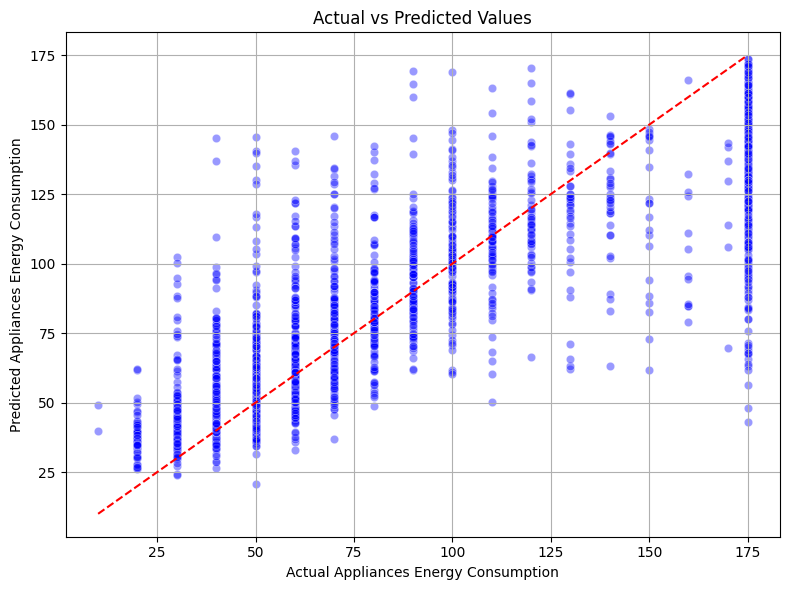

In [154]:
# Plotting Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_test, y=final_pred, alpha=0.4, color='blue')

# Diagonal perfect prediction line
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')

plt.xlabel("Actual Appliances Energy Consumption")
plt.ylabel("Predicted Appliances Energy Consumption")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.tight_layout()
plt.show()

In [155]:
joblib.dump(grid_search.best_estimator_, 'Energy_Consumption_Prediction.joblib')

['Energy_Consumption_Prediction.joblib']

In [156]:
loaded_model = joblib.load('Energy_Consumption_Prediction.joblib')

In [157]:
pipeline.fit(X_train, Y_train)  # Fit first on training data
Y_pred = pipeline.predict(X_test)  # Then predict on test data

In [158]:
print(Y_pred)

[ 50.9  111.85  76.8  ...  67.5   72.7   98.6 ]
